# **Students Dropout Prediction**

#### **Explainable Artificial Intelligence**
**Advanced Topics in Machine Learning** - *Master Degree in Artificial Intelligence*

Project developed by:
- Guilherme Oliveira 
- Ricardo Costa
- Sara Táboas 

### **Table of Contents**
1. [Project Overview](#project-overview)
2. [Pre-Modelling Explanations](#pre-modelling-explanations)

    - [Exploratory Data Analysis](#eda)
        - [Dataset Overview and Quality Assessment](#dataset-overview)
        - [Feature Assessment and Visualization](#feature-assessment-and-visualization)
    
    - [Data Summarization and Reduction](#data-summarization-and-reduction)


3. [In-Modelling Explanations](#in-modelling-explanations)

    - [Decision Tree Classifier](#decision-tree-classifier)
    - [Explainable Boosting Machine](#explainable-boosting-machine)
    
4. [Post-Modelling Explanations](#post-modelling-explanations)

    - [Black Box Model Training](#black-box-training)

1000. [References](#references)

In [1]:
import sys
import os


sys.path.append(os.path.abspath("src"))

<a id="project-overview"></a>
### **Project Overview**


<span style="color:red">This project aims ...</span>



We considered for this project the *Students’ Dropout and Academic Success Dataset* from the UCI Machine Learning Repository [1](#ref-dataset).


<a id="pre-modelling-explanations"></a>
### **Pre-Modelling Explanations**


In [2]:
from utils.pre_modelling_utils import *

<a id="eda"></a>
#### **Exploratory Data Analysis**


<span style="color:red">Exploratory Data Analysis ........</span>

- **Dataset Overview and Quality Assessment**: 
    - *What are we working with?* Characterization of data, relatively to the number of observations, number and types of features, overall missing rate and percentage of duplicate observations.

    - *What type of errors are we working with?* Deeply understand and mitigate any existing errors to improve the future Machine Learning approach.

- **Feature Assessment and Visualization**: 
    - *How to understand the features and its relations?* Understanding of the dataset features' individual properties - *Univariate Analysis* - as well as their interactions and relationships - *Multivariate Analysis*


<a id="dataset-overview"></a>
1. ***Dataset Overview and Quality Assessment*** 

In [3]:
df = pd.read_csv('data.csv', sep=';')  # Load your dataset here
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [4]:
# Dataset overview
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# Data Quality: missing/duplicated data
print("Number of duplicate rows:", df.duplicated().sum())
info = pd.DataFrame({
    "Column": df.columns,
    "Missing Count": df.isnull().sum().values,
    "Dtype": df.dtypes.astype(str).values
})
info

Number of observations: 4424
Number of features: 37
Number of duplicate rows: 0


Column  Missing Count    Dtype
0                                   Marital status              0    int64
1                                 Application mode              0    int64
2                                Application order              0    int64
3                                           Course              0    int64
4                     Daytime/evening attendance\t              0    int64
5                           Previous qualification              0    int64
6                   Previous qualification (grade)              0  float64
7                                      Nacionality              0    int64
8                           Mother's qualification              0    int64
9                           Father's qualification              0    int64
10                             Mother's occupation              0    int64
11                             Father's occupation              0    int64
12                                 Admission grade              0  float64
13                                       Displaced              0    int64
14                       Educational special needs              0    int64
15                                          Debtor              0    int64
16                         Tuition fees up to date              0    int64
17                                          Gender              0    int64
18                              Scholarship holder              0    int64
19                               Age at enrollment              0    int64
20                                   International              0    int64
21             Curricular units 1st sem (credited)              0    int64
22             Curricular units 1st sem (enrolled)              0    int64
23          Curricular units 1st sem (evaluations)              0    int64
24             Curricular units 1st sem (approved)              0    int64
25                Curricular units 1st sem (grade)              0  float64
26  Curricular units 1st sem (without evaluations)              0    int64
27             Curricular units 2nd sem (credited)              0    int64
28             Curricular units 2nd sem (enrolled)              0    int64
29          Curricular units 2nd sem (evaluations)              0    int64
30             Curricular units 2nd sem (approved)              0    int64
31                Curricular units 2nd sem (grade)              0  float64
32  Curricular units 2nd sem (without evaluations)              0    int64
33                               Unemployment rate              0  float64
34                                  Inflation rate              0  float64
35                                             GDP              0  float64
36                                          Target              0   object

Target variable distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


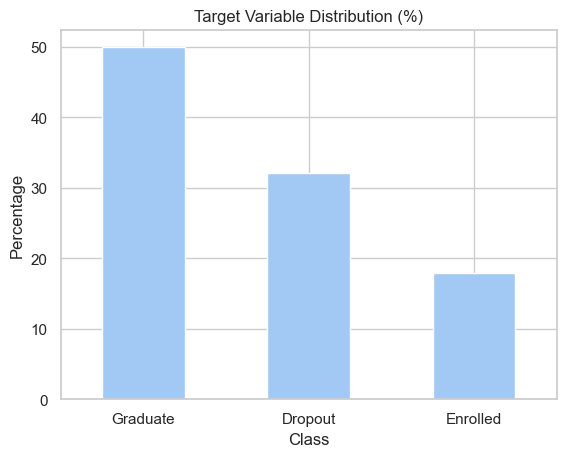

In [5]:
# Imbalance in target variable
target_counts = df['Target'].value_counts()
print("Target variable distribution:\n", target_counts)
plot_target_distribution(df)

As the goal of our project is to predict and to explain Student's Dropout, we decided to continue without observations classified as 'Enrolled'.

In [6]:
# Drop observations classified as 'Enrolled'
df = df[df['Target'] != 'Enrolled']
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [7]:
print("Number of observations after dropping 'Enrolled':", df.shape[0])

Number of observations after dropping 'Enrolled': 3630


<span style="color:red">**MAPPING TARGET VARIABLE**</span>


2. ***Feature Assessment and Visualization***

The dataset was collected to enable early identification of at-risk students, including information available at enrollment (e.g. academic background, demographics, socio-economic status) and academic performance after the 1st and 2nd semesters.

These features can be grouped into several categories:

- Demographic data;

- Socio-economic data;

- Macro-economic data;

- Academic data at enrollment;

- Academic data at the end of 1st semester;

- Academic data at the end of 2nd semester;

- Target;

These groups of features will later be used to help their analysis.
    

**Univariate Analysis**

Analysis the individual characteristics of each feature, to further help on decisions such as their relevance for the analysis itself and the type of data preparation required to achieve our project goals. 

- **Numerical Features:** most often comprise information regarding mean, standard deviation, skewness, and other quantile statistics, and are best represented using histogram plots

- **Categorical Features:** usually described using the mode and frequency tables, and represented using bar plots for category analysis.

**A) Demographic Data:**
- Marital Status
- Nationality
- Displaced
- Gender
- Age at enrollment
- International 

As mentioned before, we will treat Marital status, Nacionality, Displaced, Gender and International as categorical features. The remaining one, Age at enrollment will be treated as its data type (numerical)

In [8]:
demographic_features = ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']

numerical_demographic = ["Age at enrollment"]
categorical_demographic = ["Marital status", "Nacionality", "Gender", "Displaced", "International"]

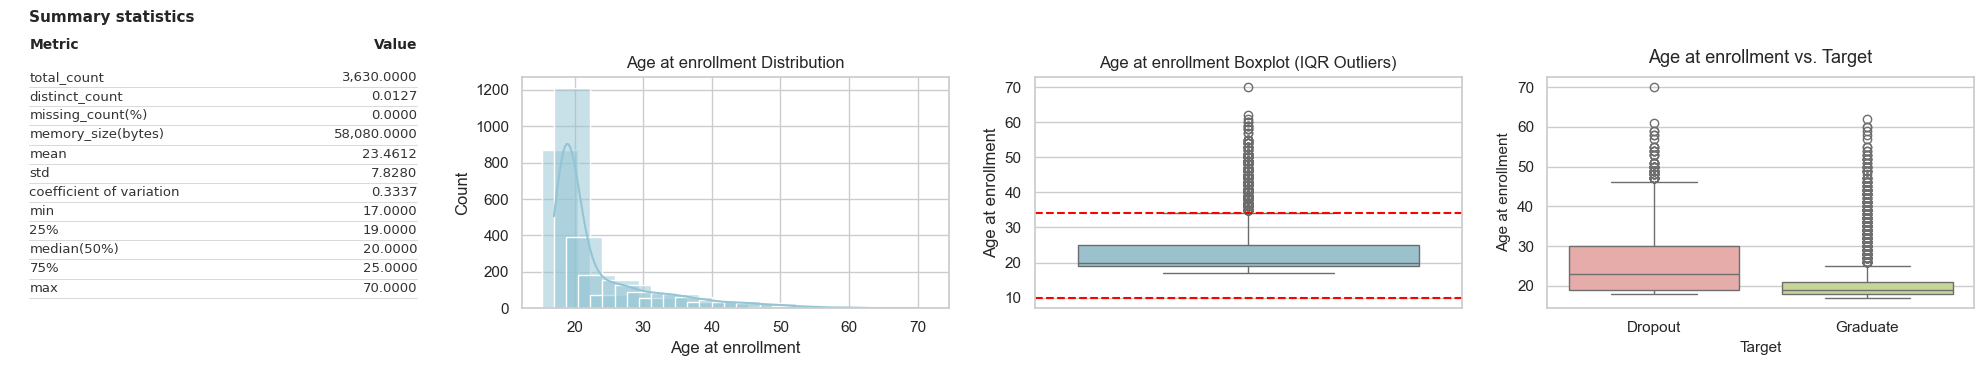

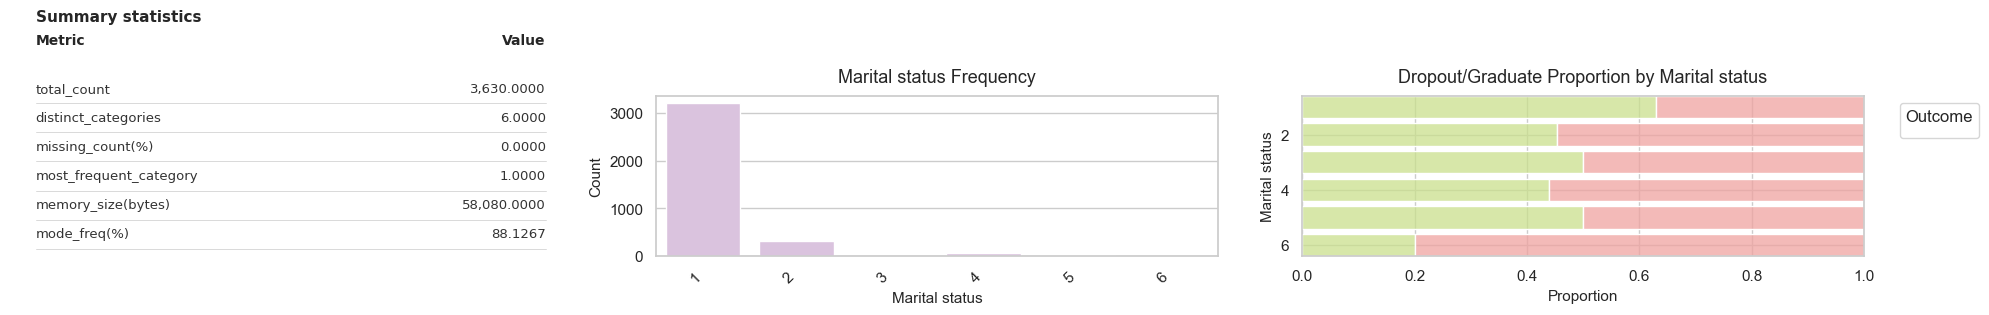

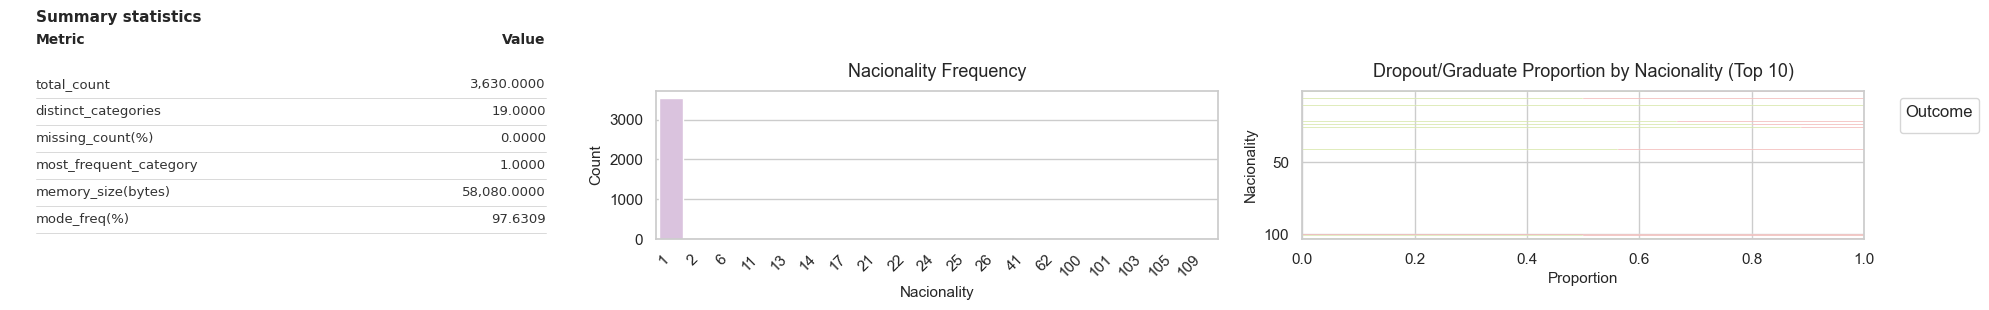

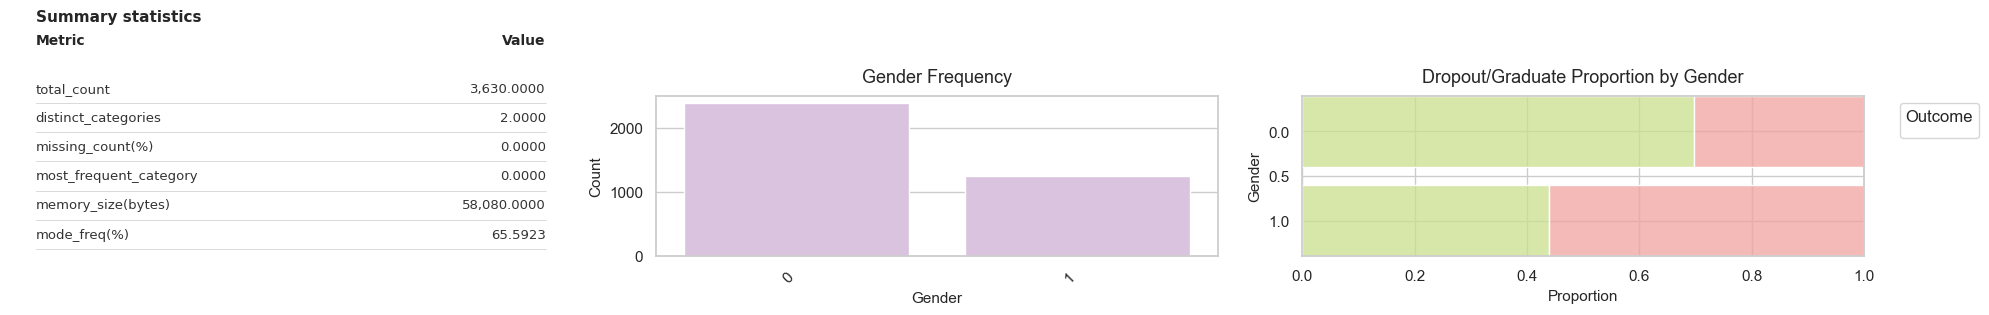

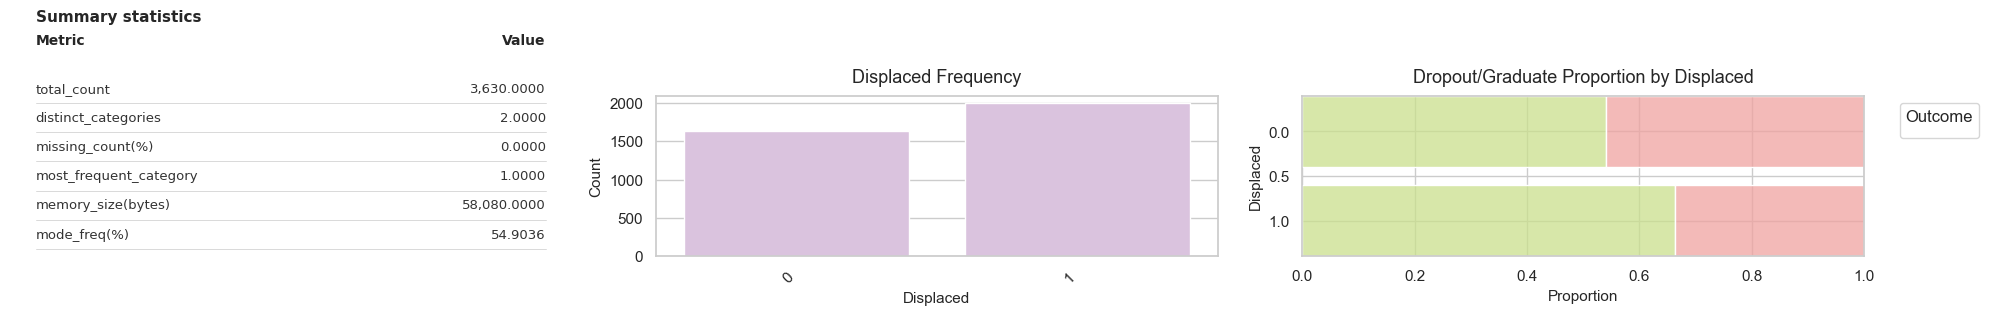

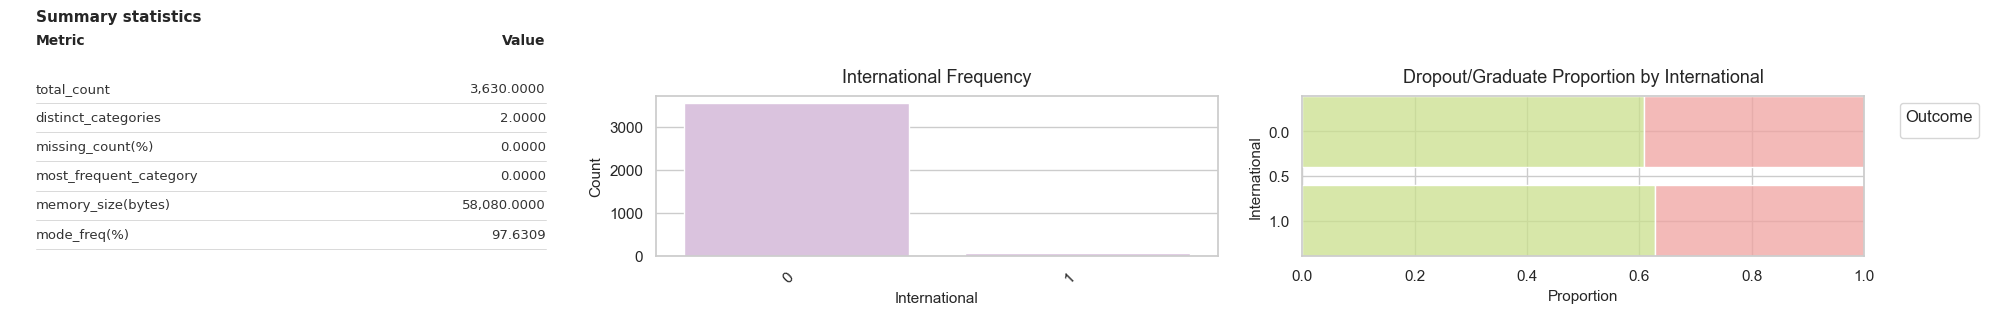

In [9]:
visualize_features_cards(df, numerical_demographic, categorical_demographic, target_col='Target')

**Age at enrollment**

- Strong right skew — most students are around 18–20, with a long tail up to age 70.
- Atypical older students are present in small numbers.

Older students may face more dropout risk. We might consider futuruly to create bins (e.g. ≤25, 26–35, 35+) for interpretability.

**Marital Status**
- The vast majority of students are in category 1, which likely represents "Single."

- Other categories are underrepresented → implies low demographic diversity on this variable.

*Implication* : Might have low predictive value unless married students are heavily correlated with dropout. Something to be checked later;

**Nationality**
- Extremely skewed — almost all students have the same nationality code (Portuguese).

- Few outliers at higher codes (maybe international students).

*Implication*: High imbalance makes it hard to learn patterns from nationality unless outliers behave very differently (e.g. higher dropout or success rates)


**Gender**

- Imbalanced, but still has both categories represented (likely 0 = female, 1 = male).

- Females appear to be ~65–70%.


**Displaced**

- Fairly balanced between 0 and 1 → both local and displaced students are represented.


**International**

- Almost all students are domestic (0). Very few international students.

*Implication*: Variable is nearly constant → may not contribute to the model.  Treating this variable will have to be done  carefully, we might consider delete it;

**B) Academic Backgroud Data**

Information about the student’s entry into the program – including previous qualification level (e.g. high school, prior degree), their admission grade (entry exam score or prior GPA), the degree program (course) chosen, and application details (application mode and order of preference) 

<span style="color:red">**COMO TRATAR A APPLICATION ORDER???**</span>

In [10]:
academic_background_features = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

numerical_academic_background = []
categorical_academic_background = ['Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

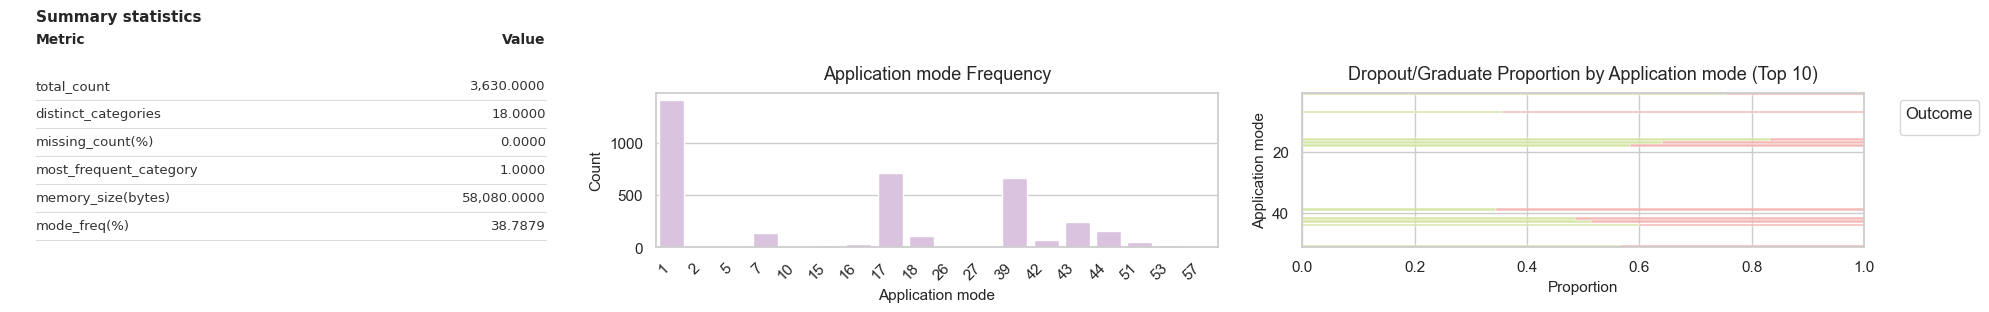

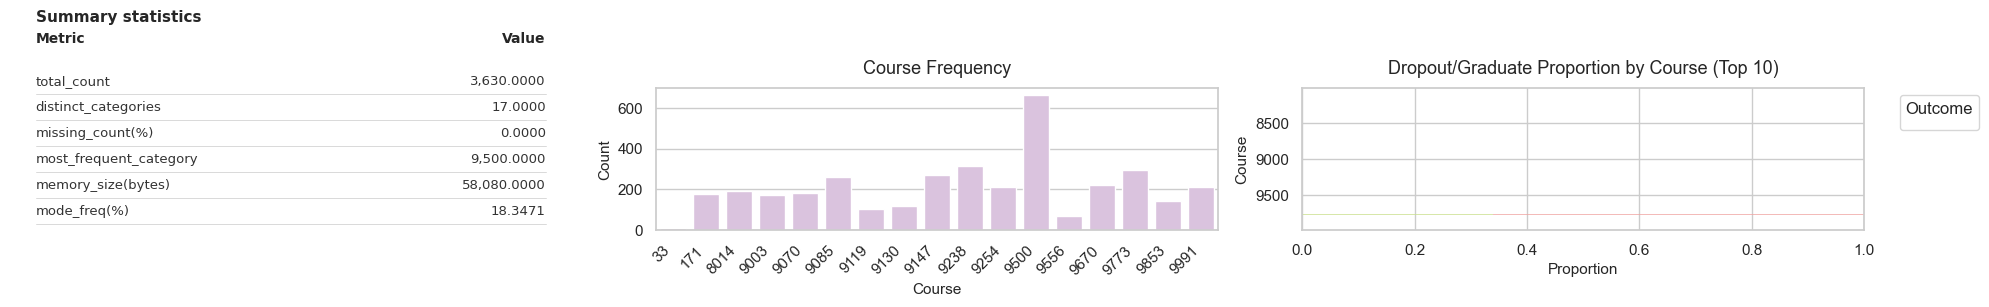

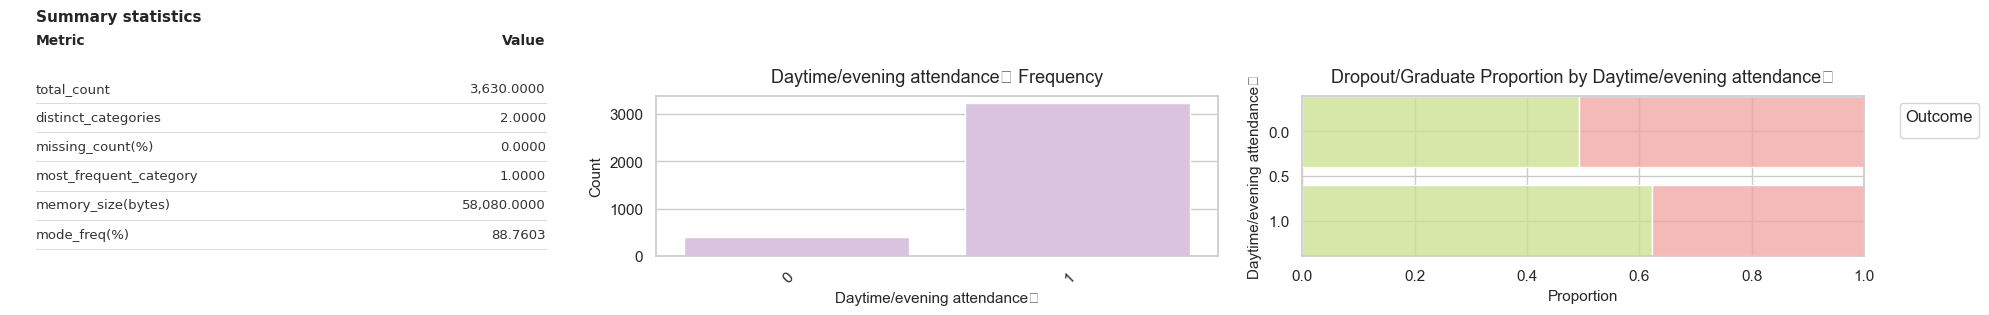

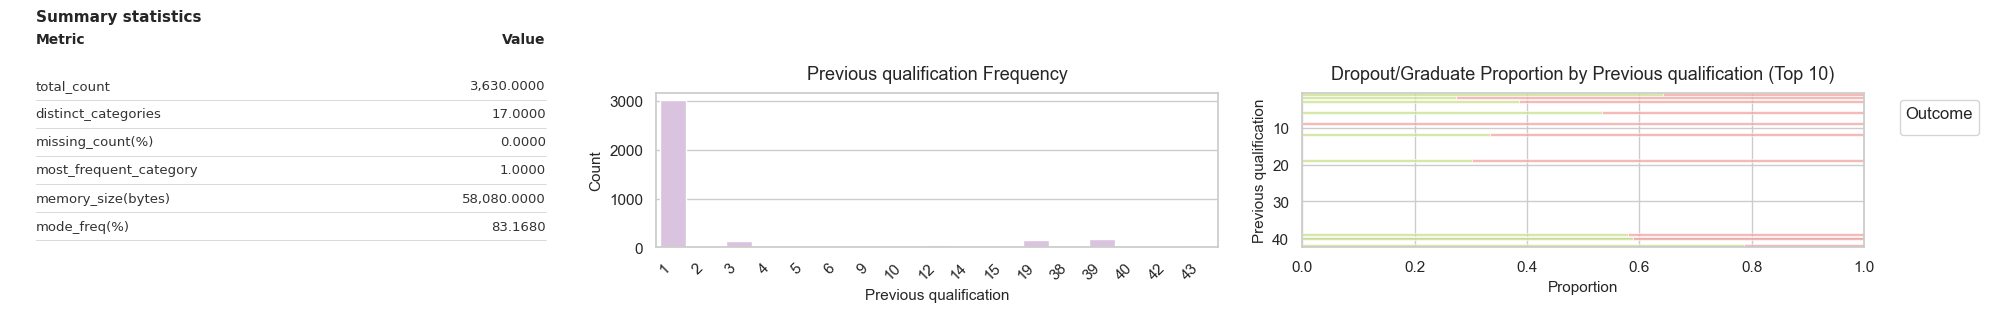

In [11]:
visualize_features_cards(df, numerical_academic_background, categorical_academic_background, target_col='Target')

**C) Socio-Economic Data**

In [12]:
socio_economic_features = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

numerical_socio_economic = []
categorical_socio_economic = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

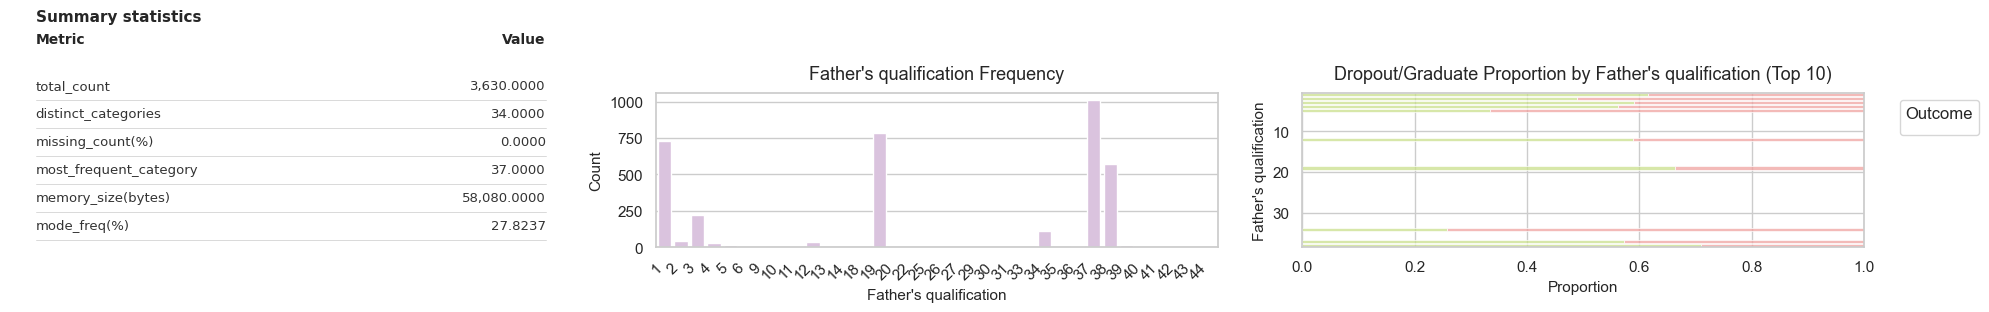

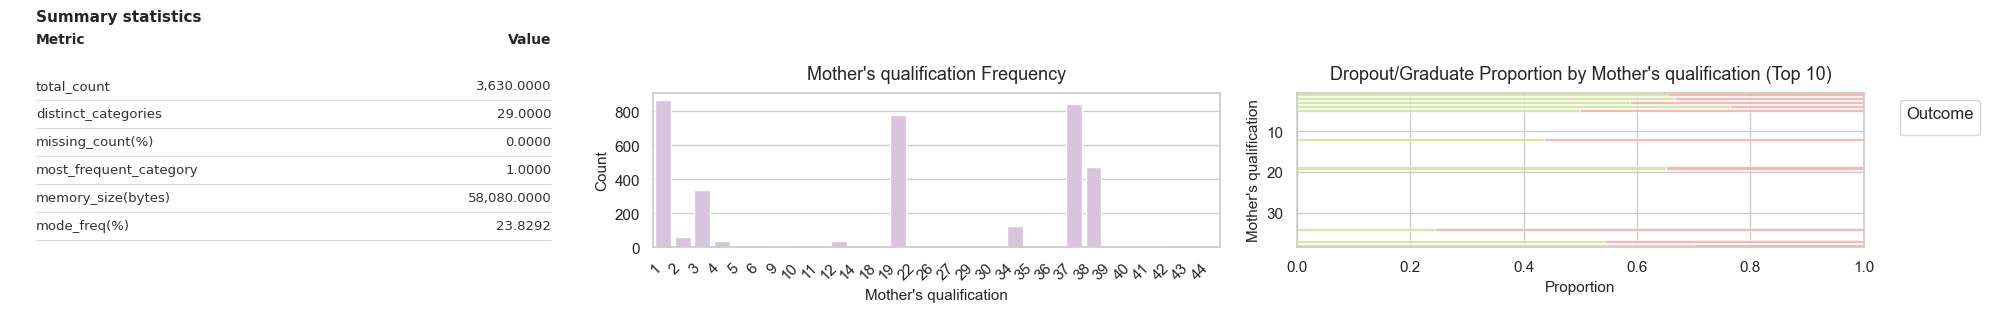

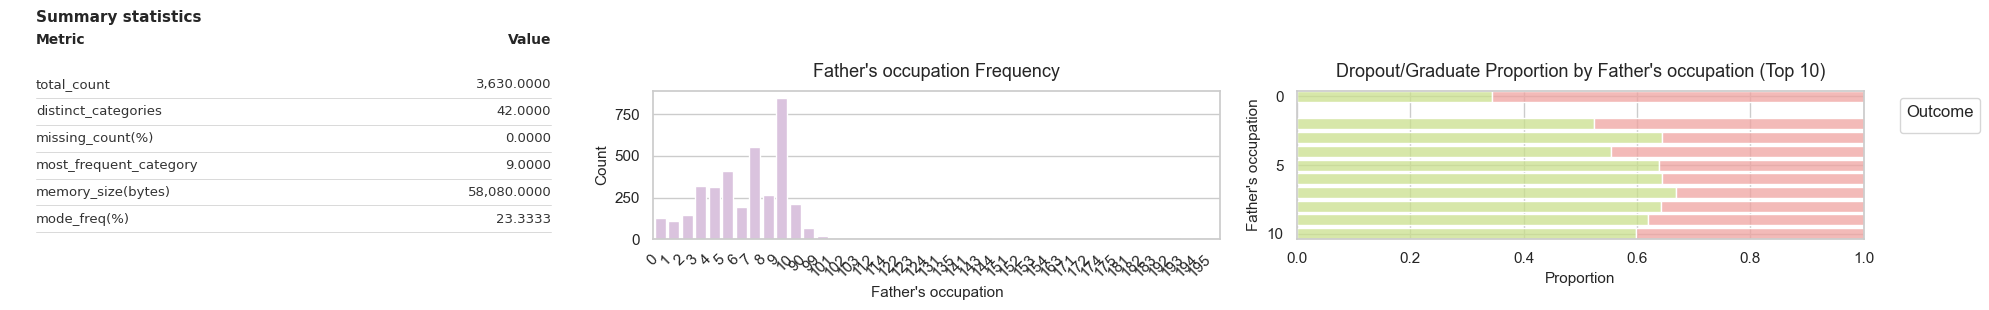

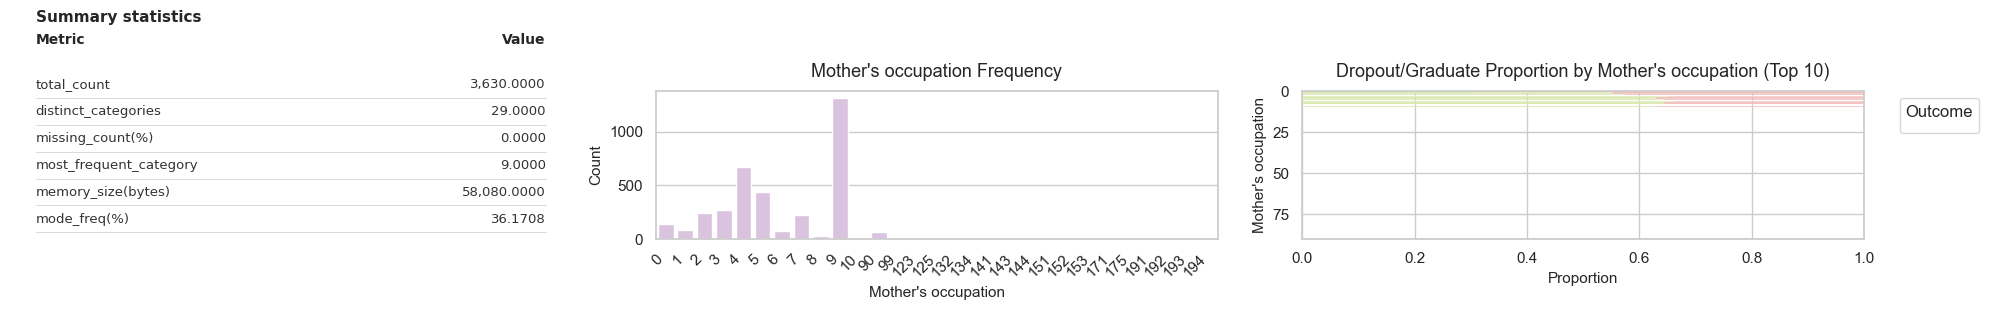

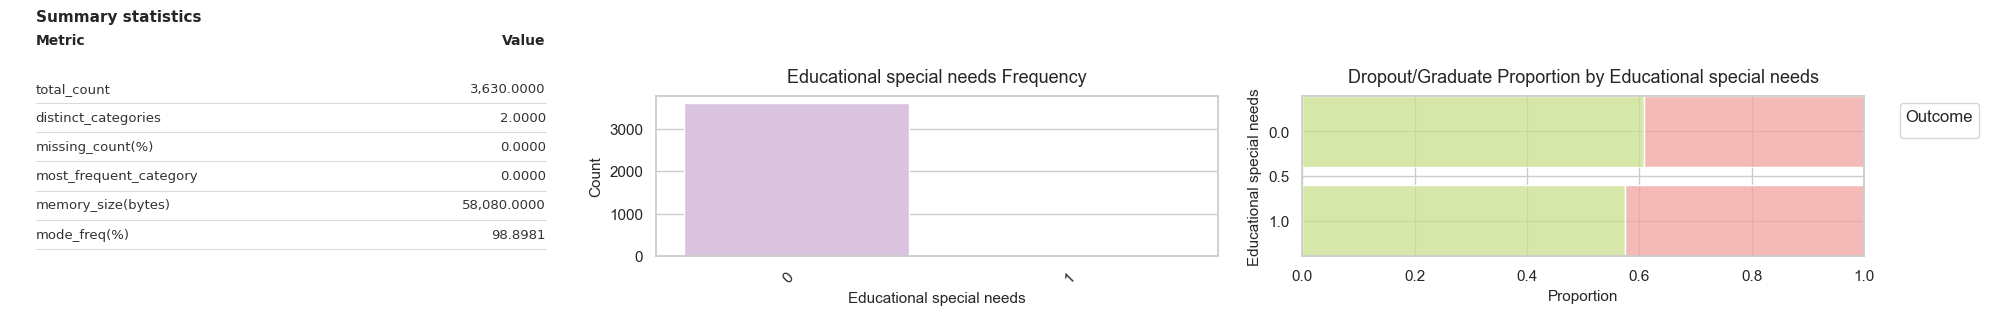

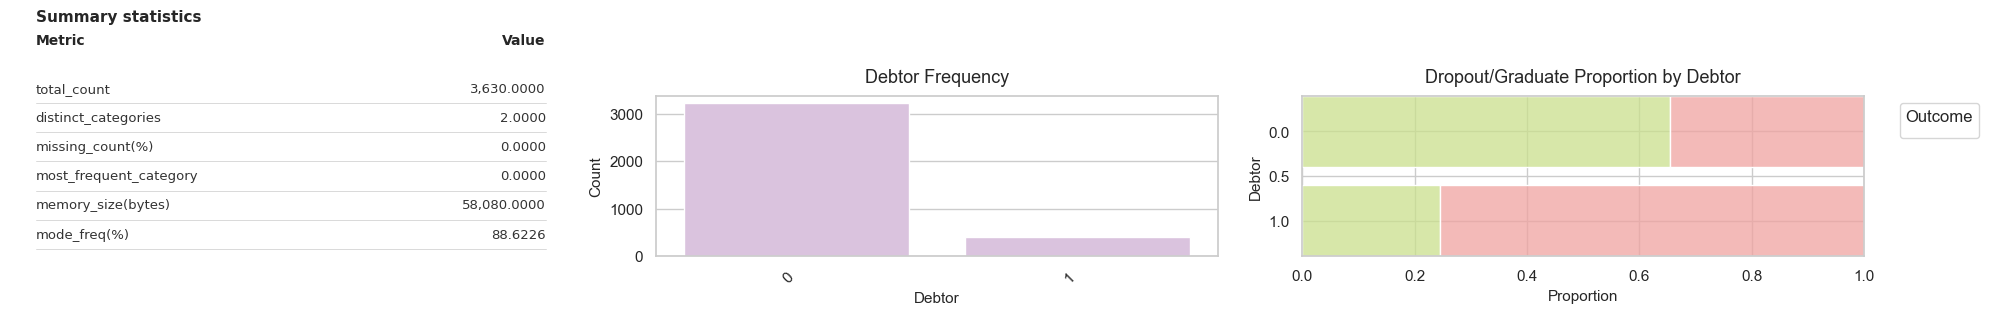

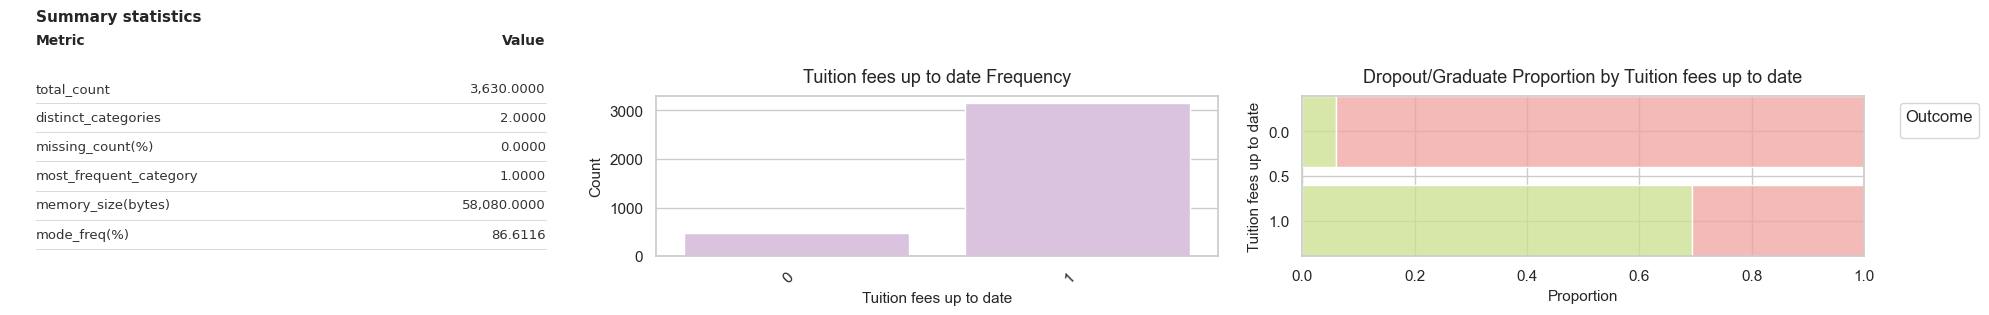

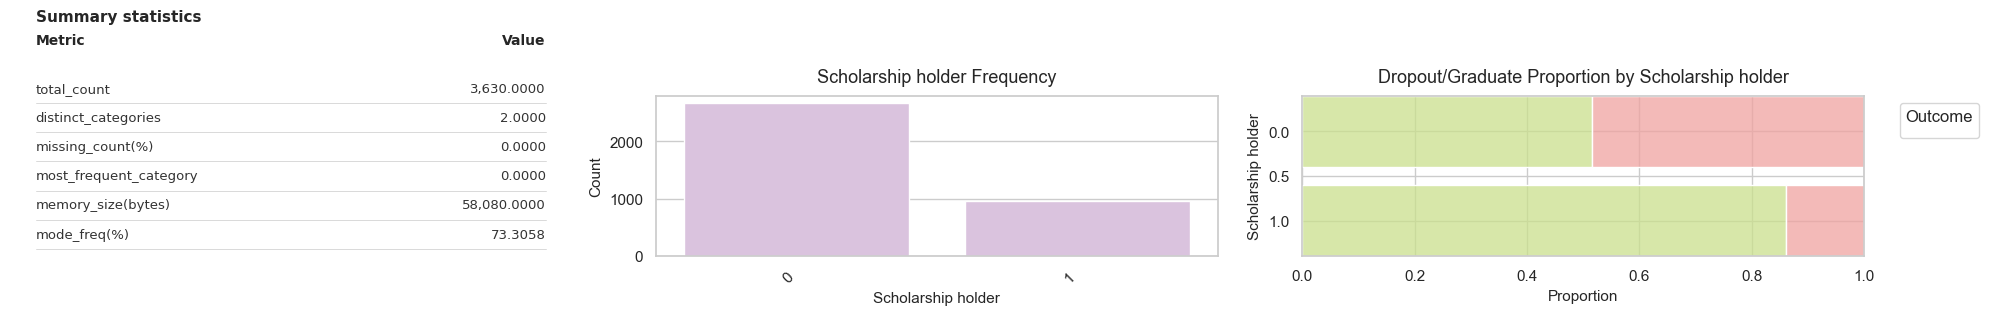

In [13]:
visualize_features_cards(df, numerical_socio_economic, categorical_socio_economic, target_col='Target')

**D) Macro-Economic Data**

In [14]:
macro_economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
numerical_macro_economic = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_macro_economic = []

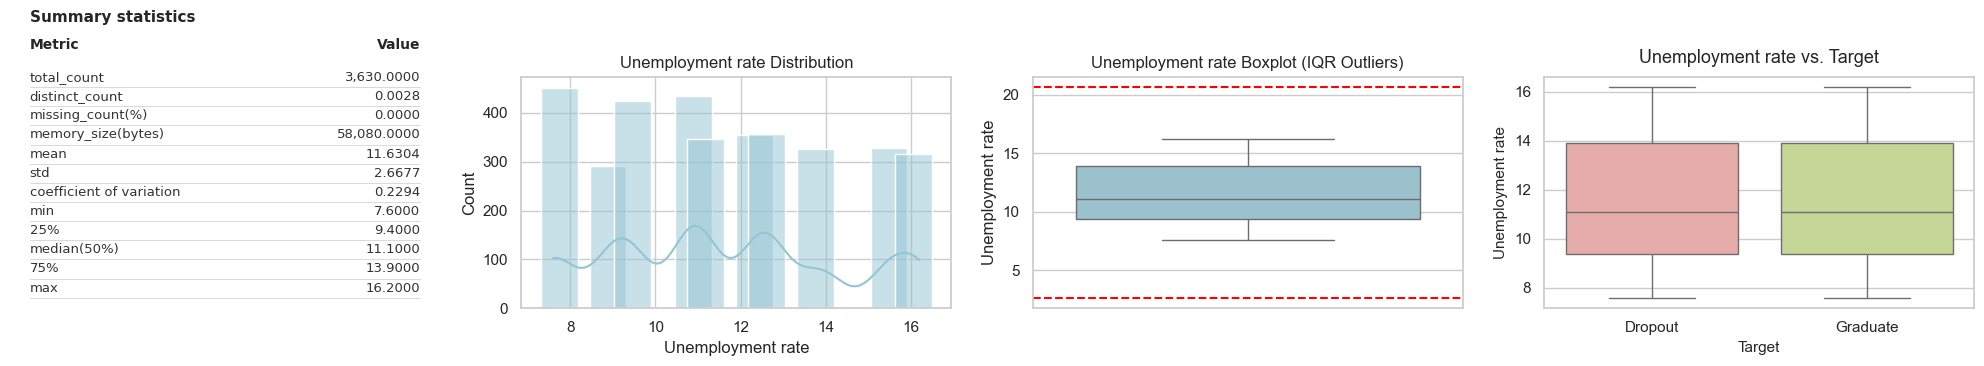

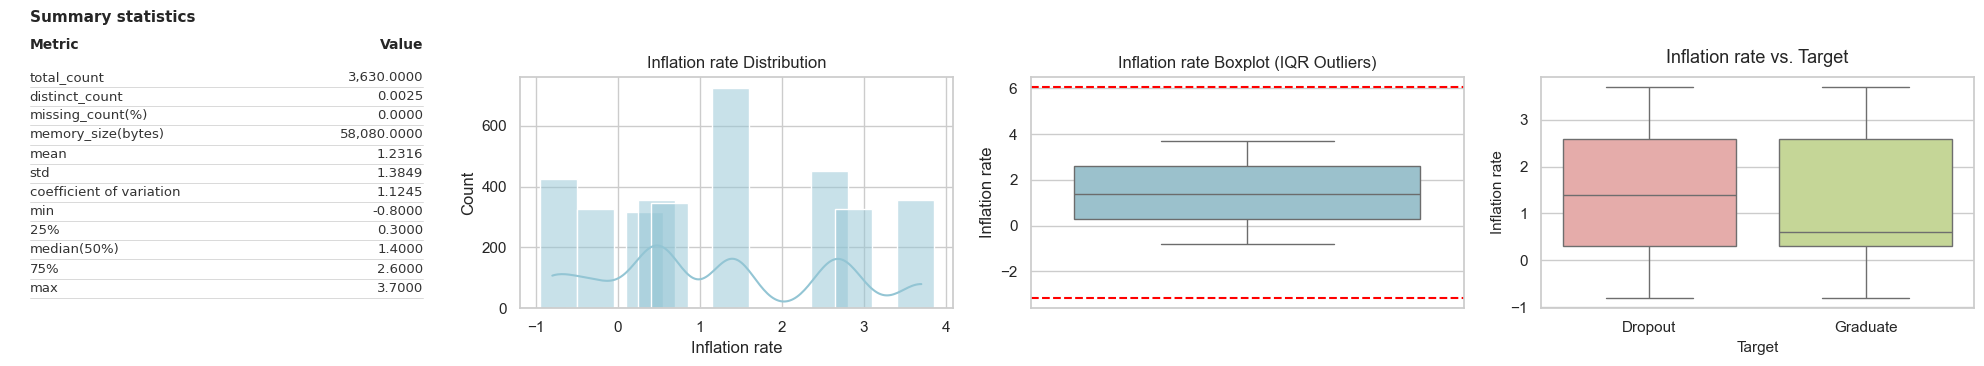

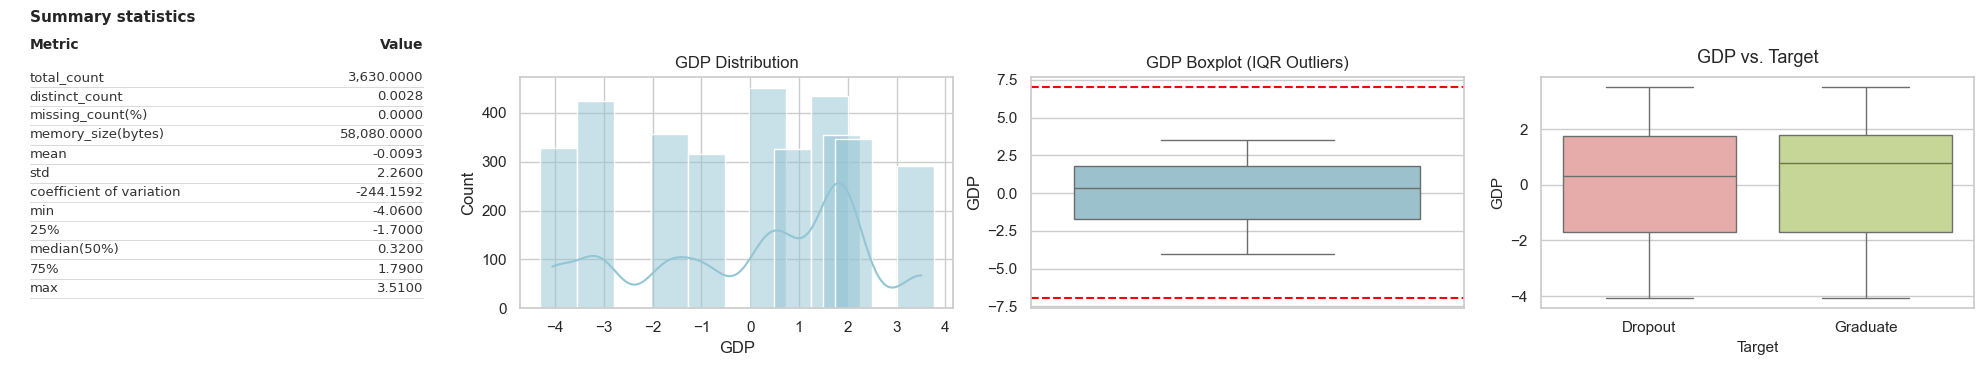

In [15]:
visualize_features_cards(df, numerical_macro_economic, categorical_macro_economic, target_col='Target')

**E) Academic Performance Data**

In [16]:
academic_performance_features = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',

    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

numerical_academic_performance = academic_performance_features
categorical_academic_performance = []

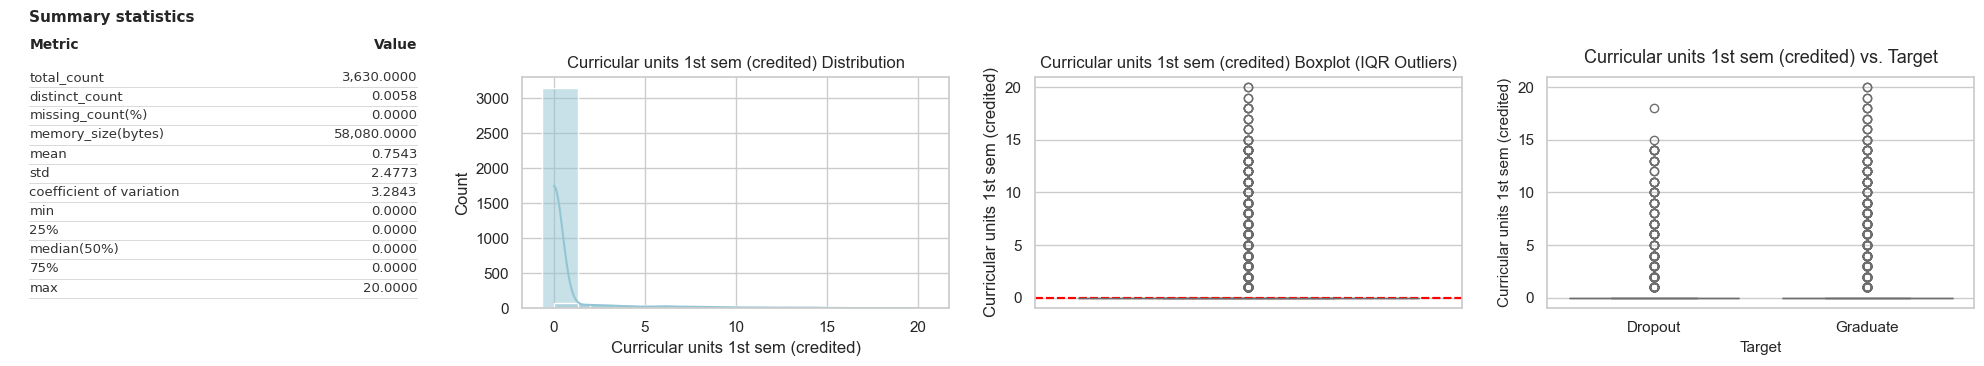

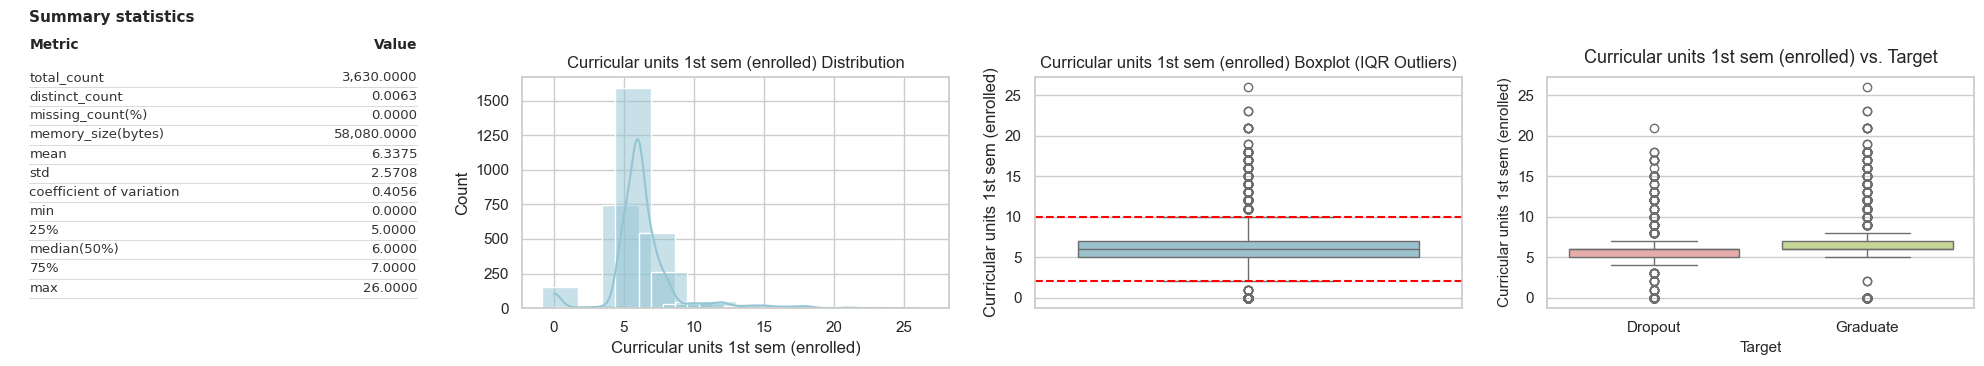

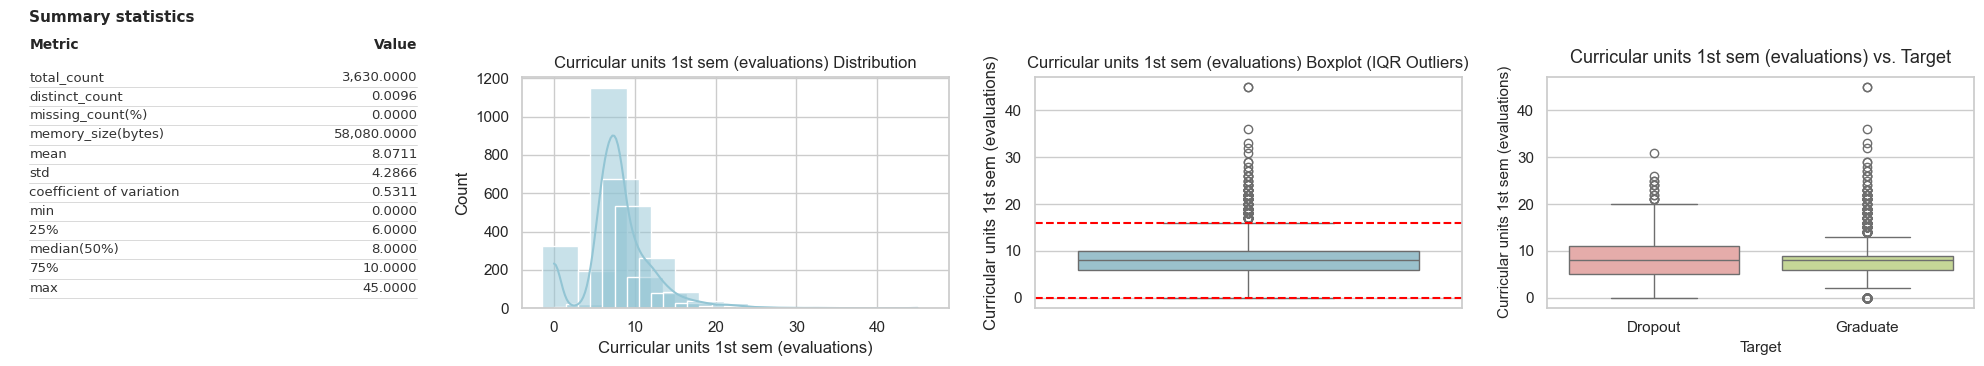

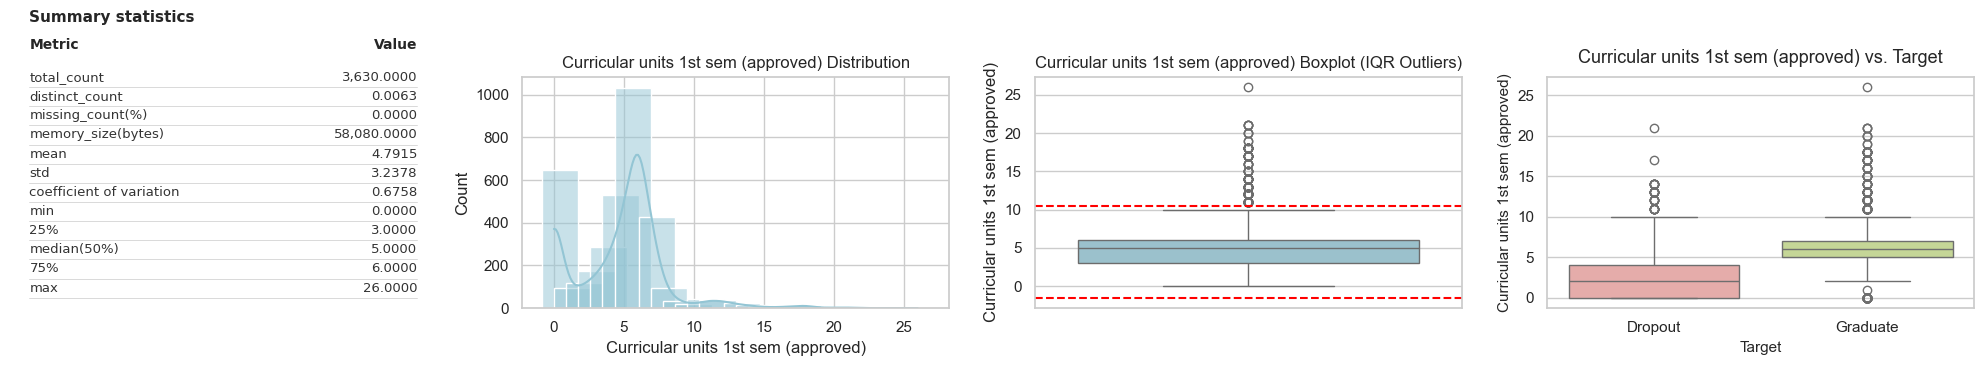

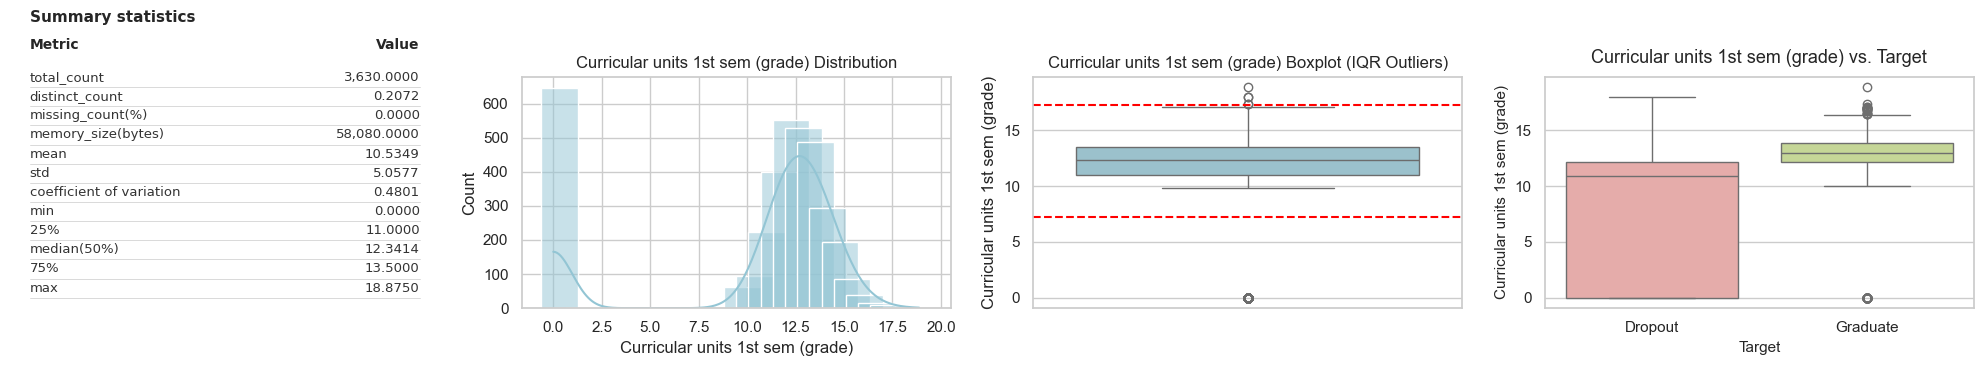

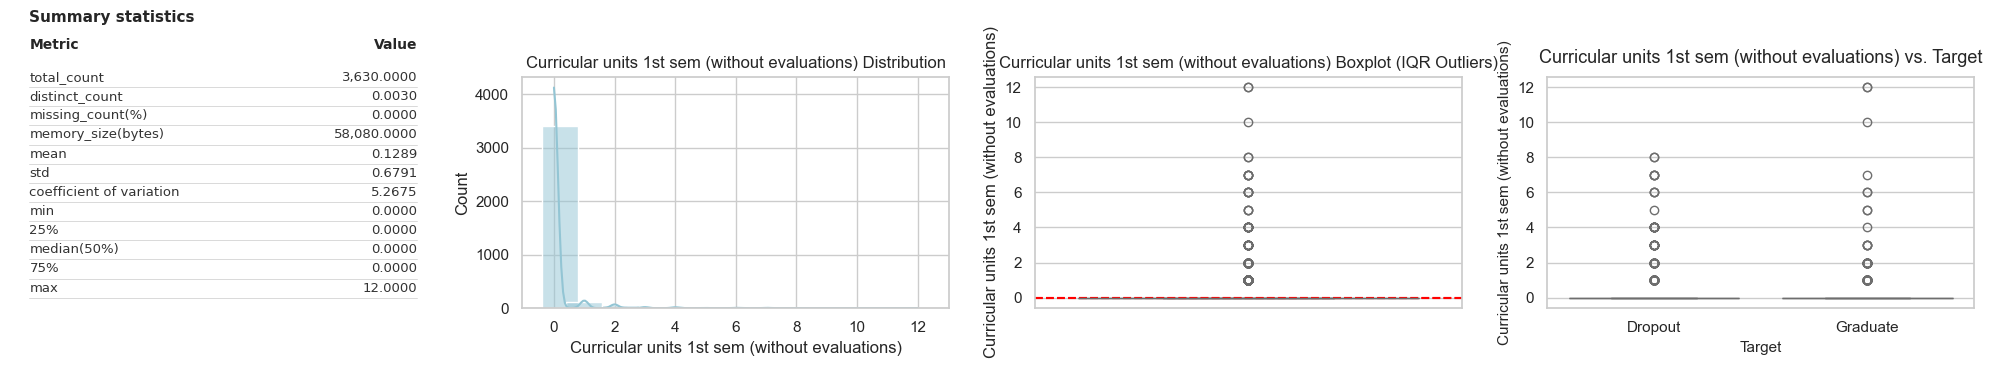

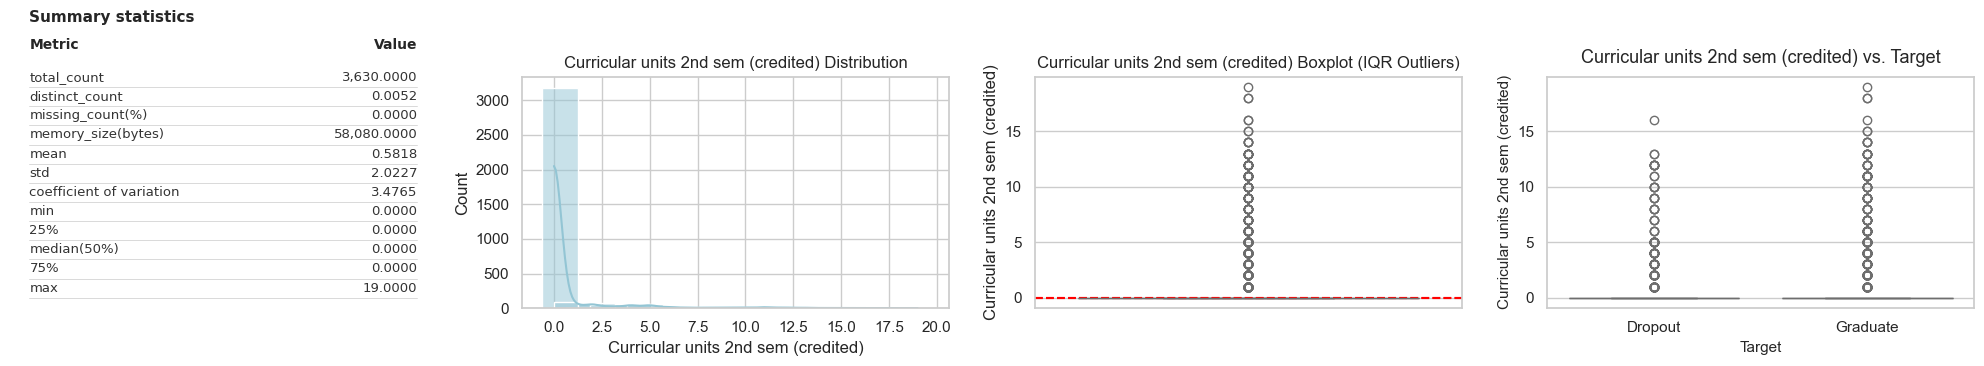

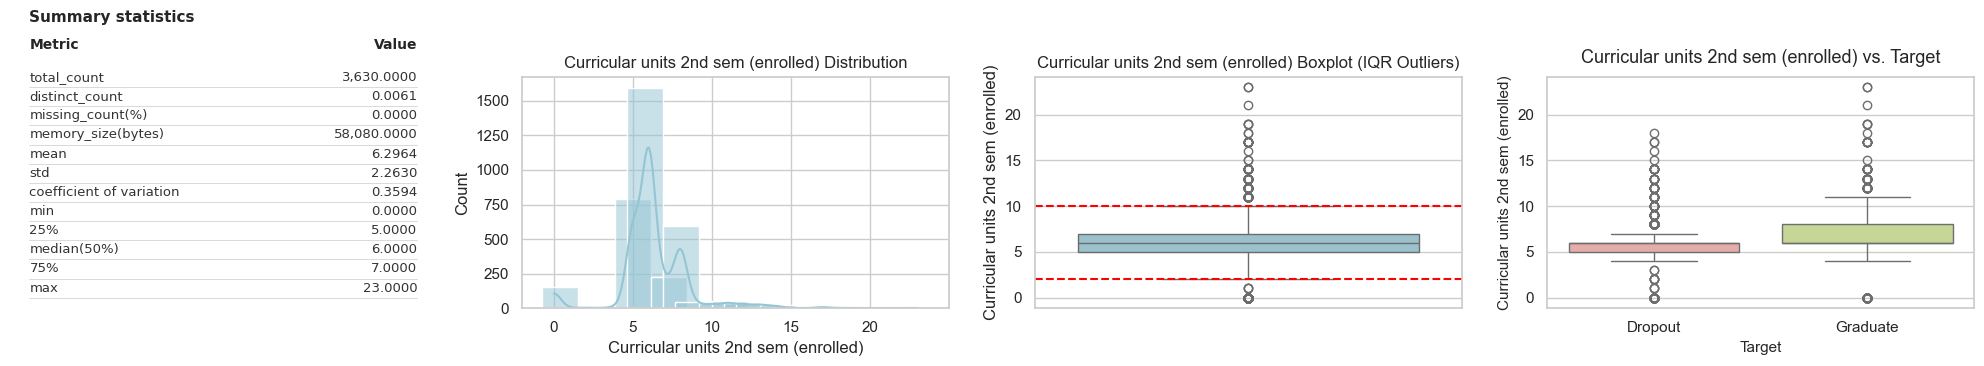

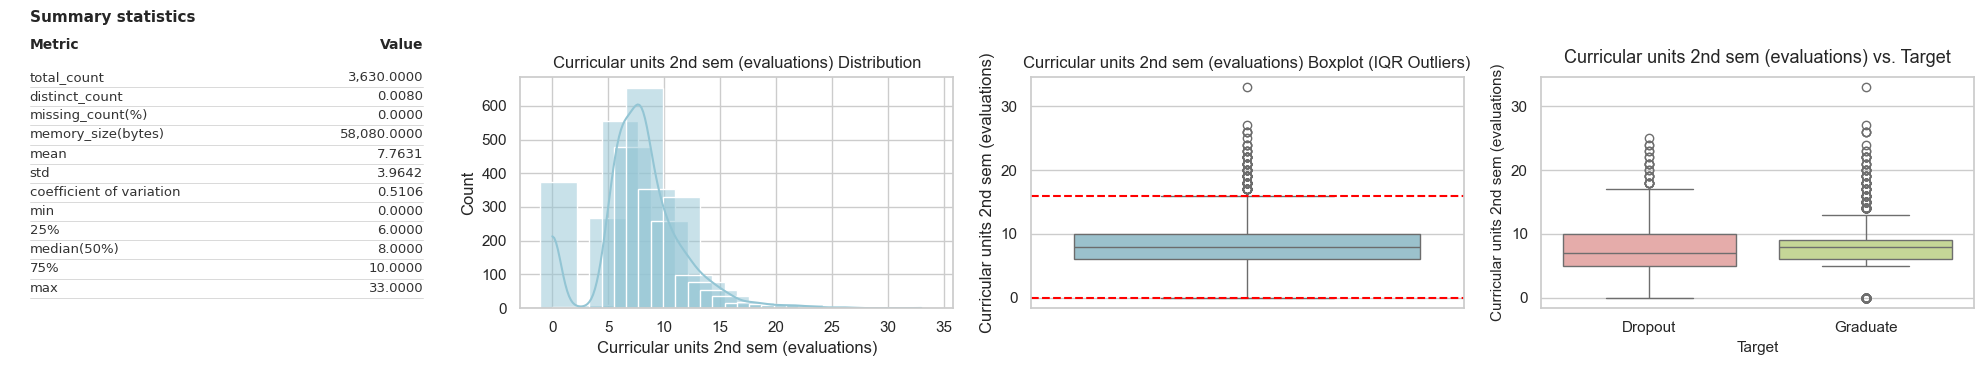

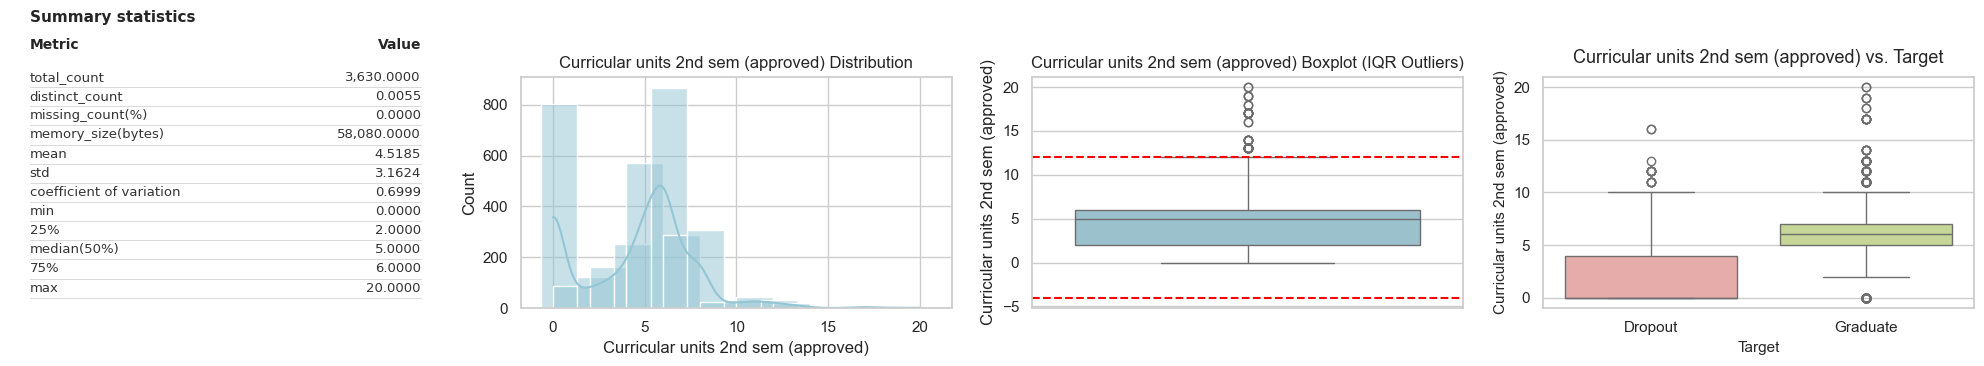

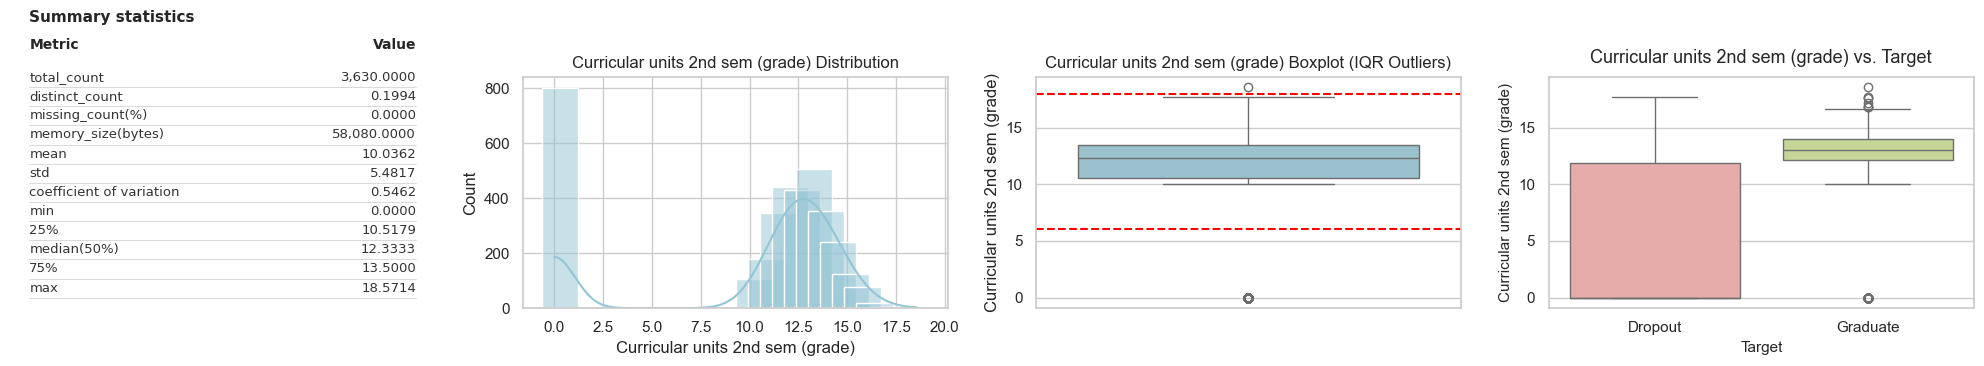

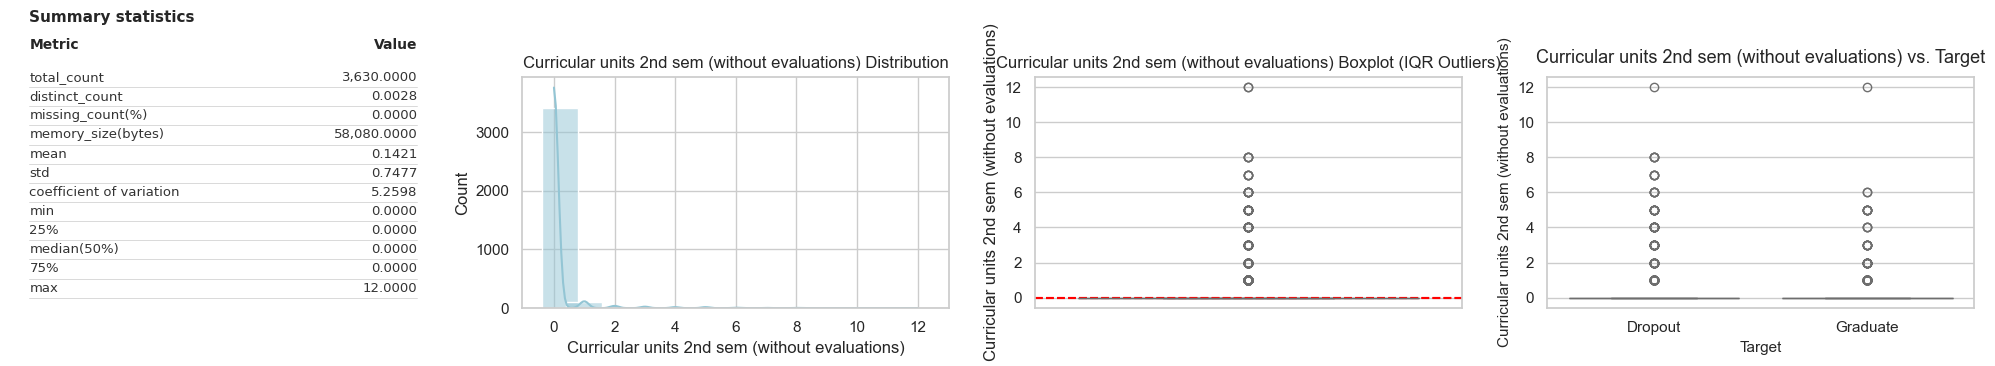

In [17]:
visualize_features_cards(df, numerical_academic_performance, categorical_academic_performance, target_col='Target')

**Multivariate Analysis**

- ***Analysing Correlations*** - analysing and quantifying the relation between features -> correlation matrix or heatmap
    
    Important about correlations:
    - Numeric vs. Numeric correlations: measured using Spearman's rank correlation coefficient
    - Categorical vs. Categorical correlations: measured using Cramer's V
    - Numerical vs. Categorical correlations: also use Cramer's V, where the numeric feature is first discritized

In [18]:
numeric_features = numerical_demographic + numerical_academic_background + numerical_socio_economic + numerical_macro_economic + numerical_academic_performance
categorical_features = categorical_demographic + categorical_academic_background + categorical_socio_economic + categorical_macro_economic + categorical_academic_performance

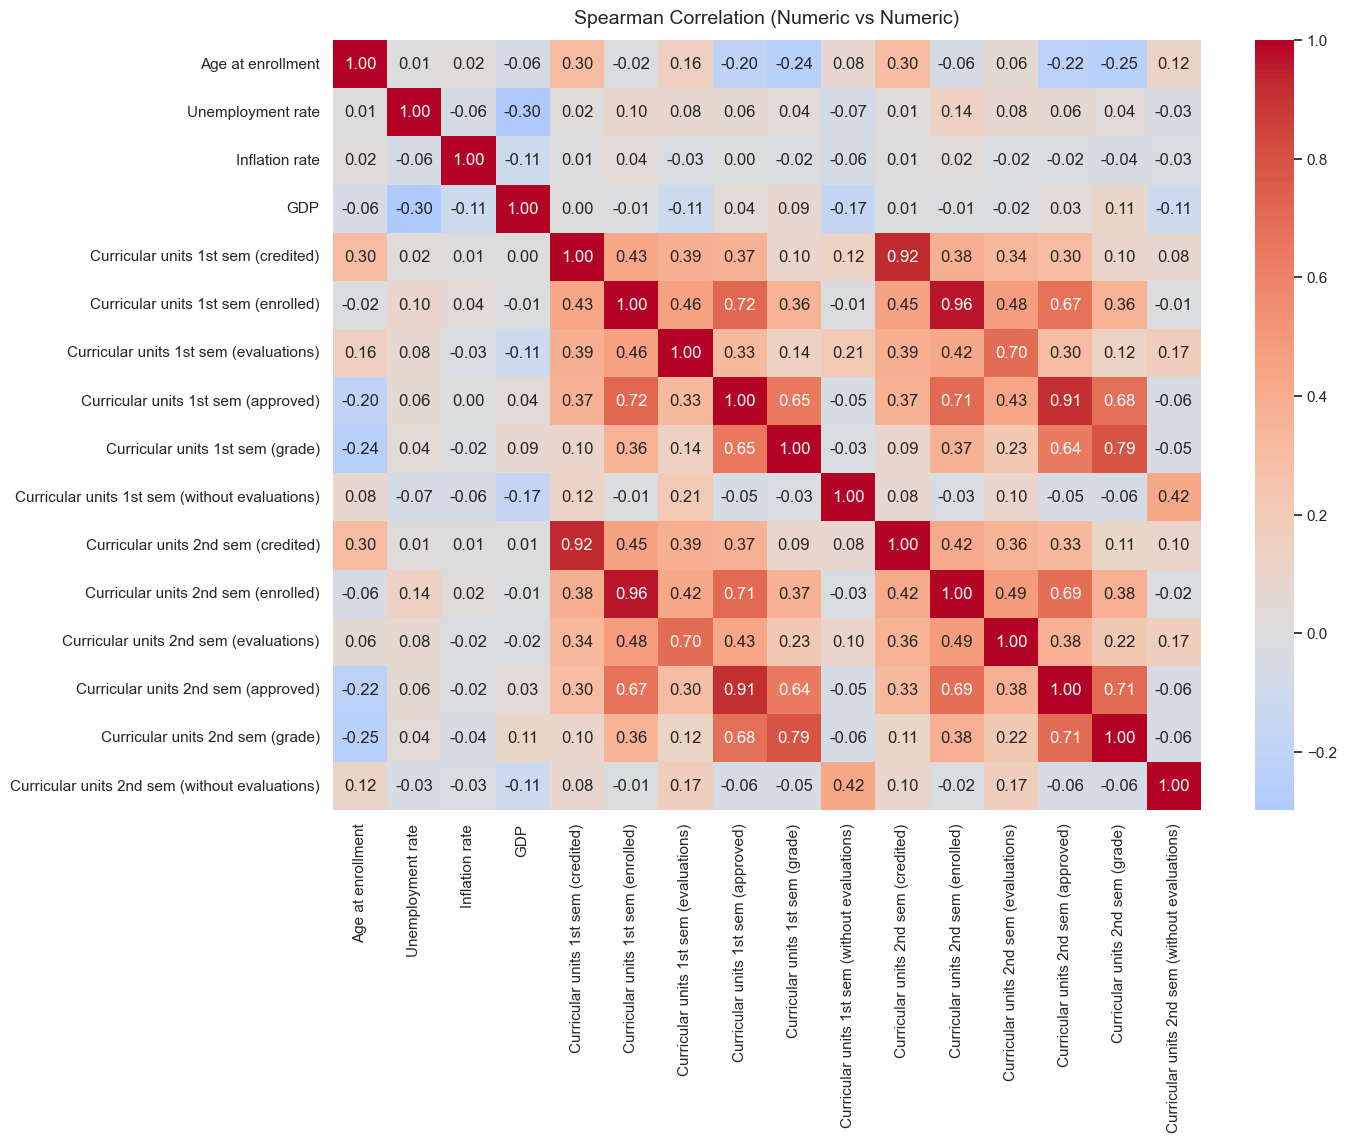

In [19]:
plot_numeric_correlation_matrix(df, numeric_features)

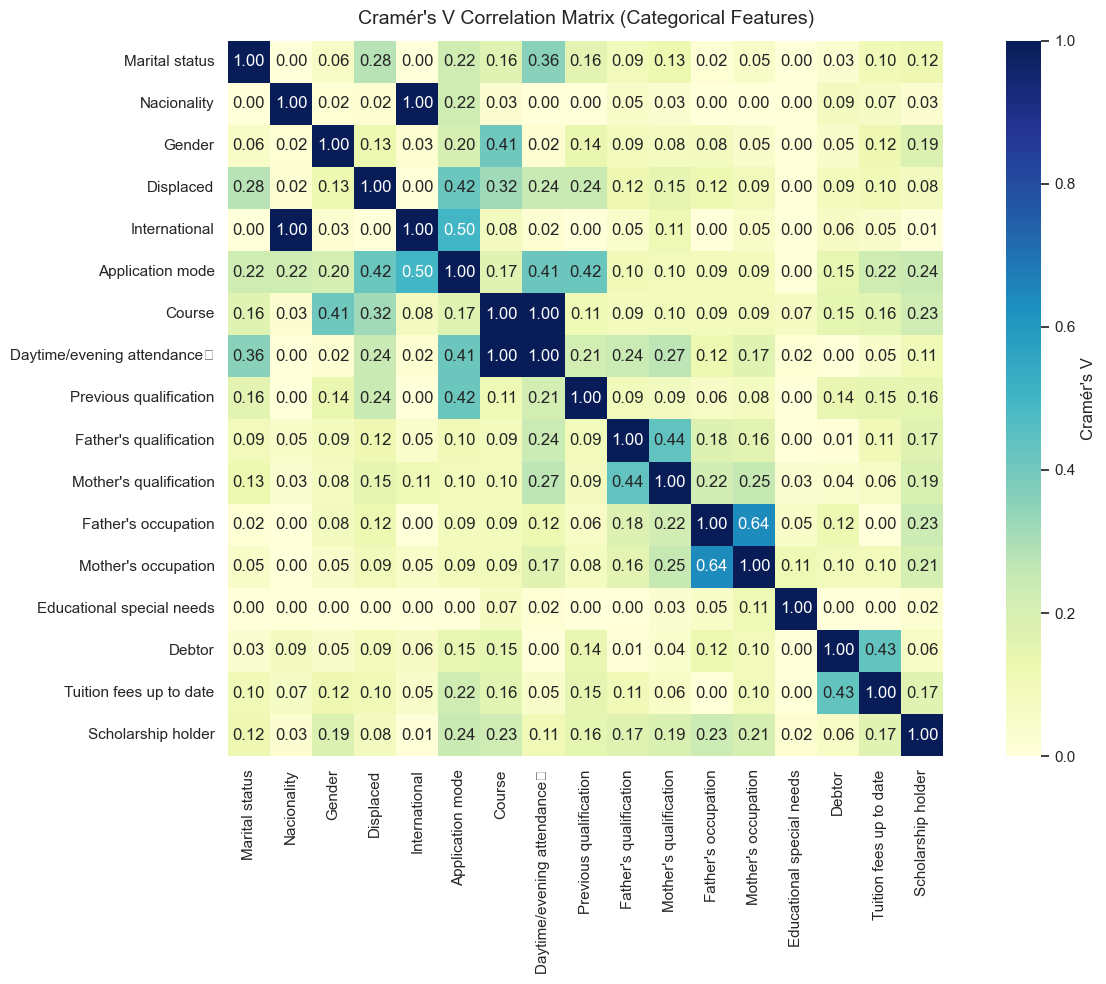

In [20]:
plot_categorical_correlation_matrix(df, categorical_features)

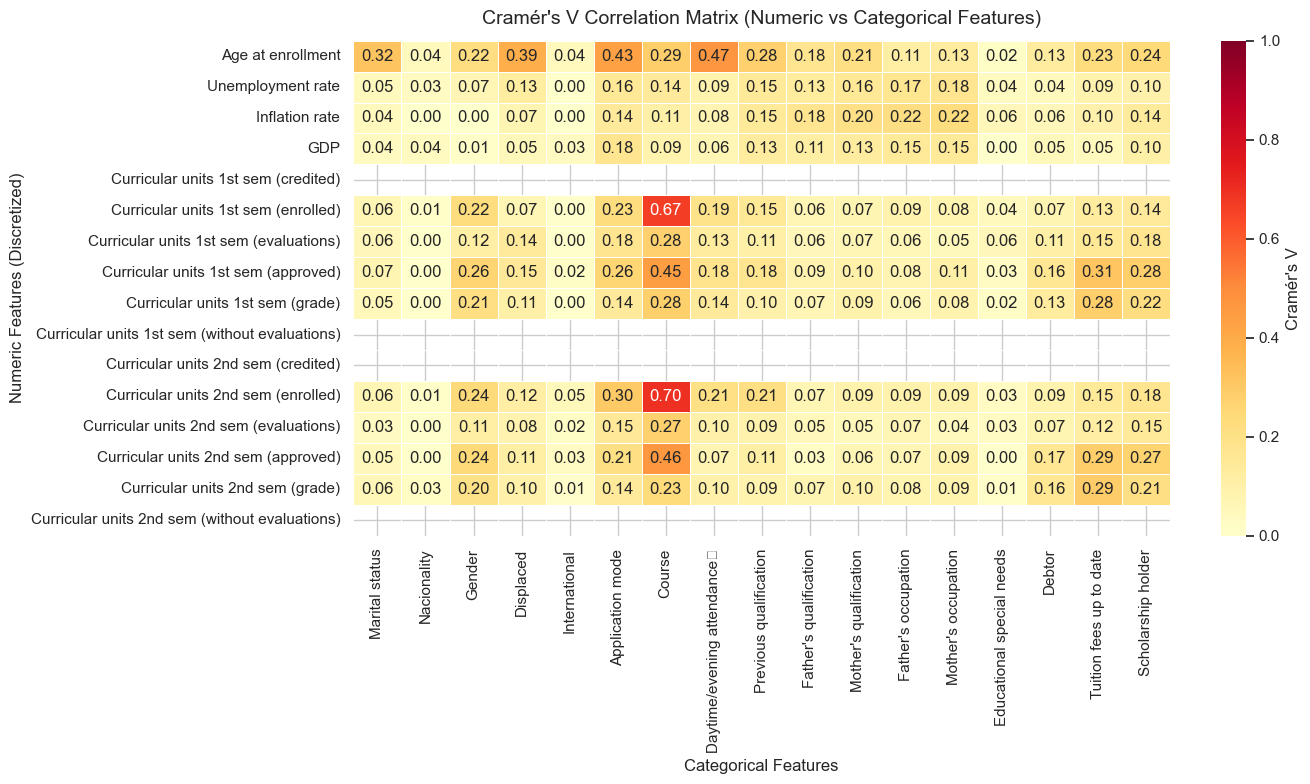

In [21]:
plot_numeric_categorical_correlation_matrix(df, numeric_features, categorical_features)

<a id="data-summarization-and-reduction"></a>
#### **Data Summarization and Reduction**


**PCA and t-SNE (UMAP)** - represent the data in a reduced dimension to better understand and visualize data structures

Explained variance by PC1: 33.11%
Explained variance by PC2: 12.52%
Total variance explained by 2 components: 45.63%


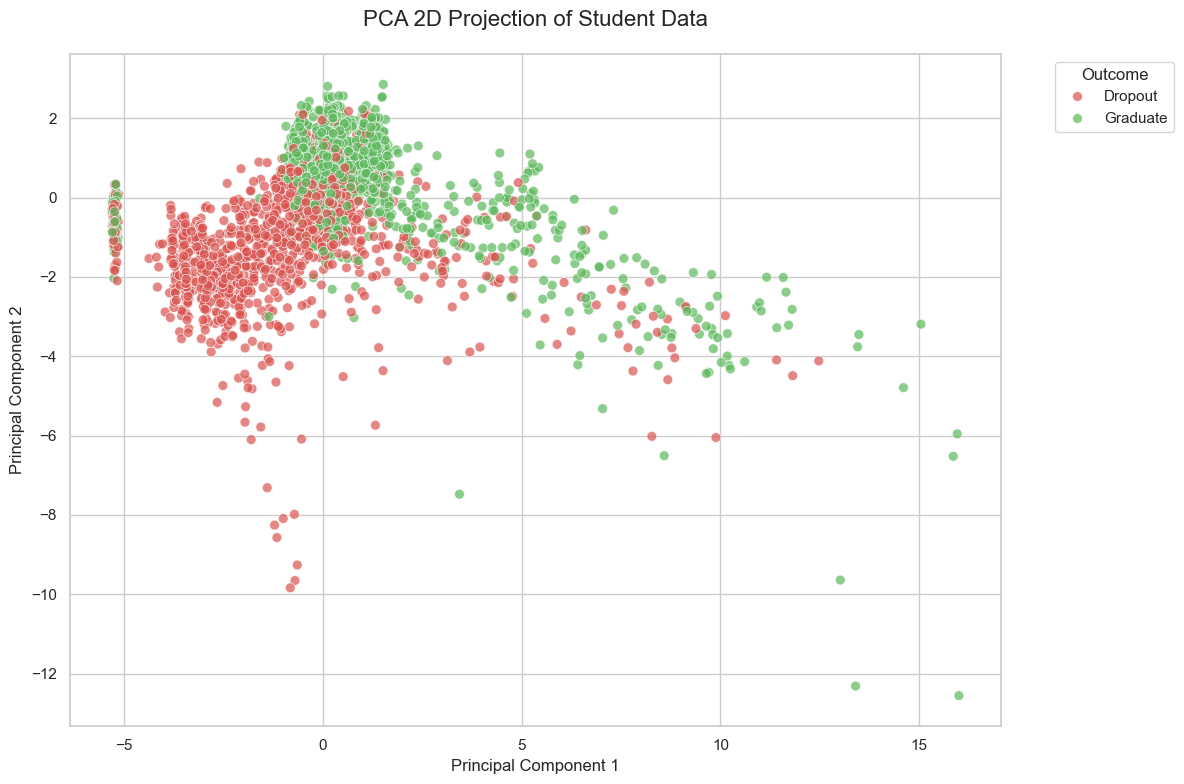

In [22]:
plot_pca_projection(df, categorical_features, target_col='Target')


**PCA (Principal Component Analysis)** was used to reduce the dimensionality of the numerical data, projecting it into two dimensions (PC1 and PC2). The two principal components explain a significant part of the total variance in the data.

**Observations:**
- The scatter plot shows students based on their outcomes ('Dropout' or 'Graduate').
- Although there is no perfectly linear separation between the two classes, we can observe some trends. 'Graduate' (green) and 'Dropout' (red) students form clusters that overlap considerably, suggesting that linear features alone are not sufficient for a clear distinction.
- The overlap indicates that the profiles of students who drop out and those who graduate are complex and share many similarities when analyzed through a linear projection.

--- Running t-SNE ---


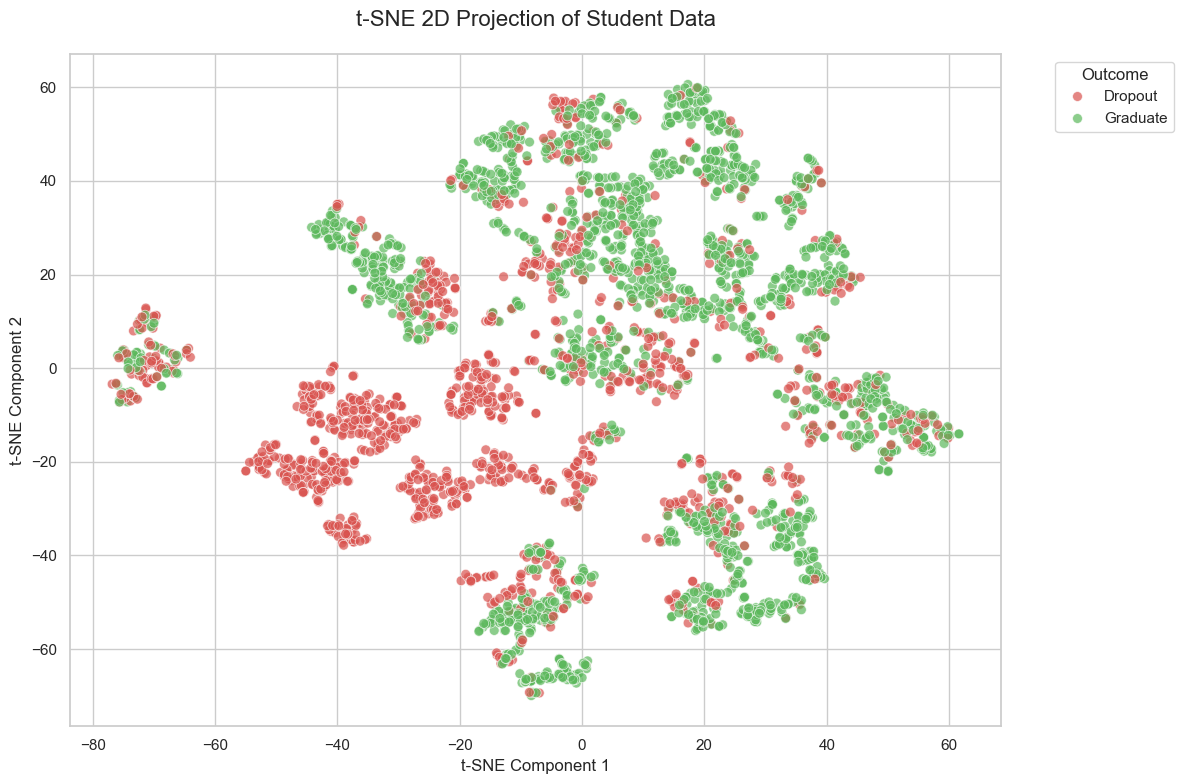

In [23]:
plot_tsne_projection(df, categorical_features, target_col='Target')

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** was used to visualize the data structure in two dimensions, focusing on preserving local neighborhood relationships.

**Observations:**
- t-SNE reveals a clearer separation between the 'Dropout' and 'Graduate' clusters compared to PCA. This suggests that while the groups are not linearly separable, there are non-linear patterns that distinguish the two outcomes.
- The 'Graduate' student cluster (in green) is more dense and cohesive, indicating that these students share more homogeneous profiles.
- The 'Dropout' student cluster (in red) is more dispersed, which may mean that the reasons for dropping out are more varied and heterogeneous.
- The existence of sub-clusters within the 'Dropout' group may indicate different profiles or causes of school dropout, which could be explored in greater detail.

<a id="in-modelling-explanations"></a>
### **In-Modelling Explanations**


In [24]:
from utils.in_modelling_utils import *

In Task 1, we uncovered key pre-modeling insights using exploratory analysis and dimensionality reduction:

- **PCA** showed  partial linear patterns distinguishing dropouts from graduates (~39% variance).
- **t-SNE** revealed stronger non-linear structure and distinct clusters of dropouts.
- Certain features (e.g., nationality, gender, curricular units) show strong imbalance and potential predictive power.

Our goal in Task 2 is to train transparent ("glass-box") models that can:

- Achieve meaningful prediction accuracy on this multiclass task (Dropout, Enrolled, Graduate).
- Provide **human-interpretable explanations** of global feature importance and local decisions.

We’ll begin with:
- **Decision Tree Classifier**: simple, transparent, and easy to visualize.
- **Explainable Boosting Machine (EBM)**: an additive model that captures non-linear effects while maintaining interpretability.

In [25]:
# Target mapping encoding
target_mapping = {'Dropout': 0, 'Graduate': 1}
df['Target'] = df['Target'].map(target_mapping)
# Train-test split
X_train, X_test, y_train, y_test = split_data(df, target_col='Target', test_size=0.2, random_state=42)

<a id="decision-tree-classifier"></a>
#### **Decision Tree Classifier**


Our dataset includes categorical (e.g., gender) and non-linear relationships (as seen in t-SNE). So we need models that can handle these patterns without becoming black boxes.

We begin with a Decision Tree classifier limited to depth 3 to establish a **baseline**  for both interpretability and predictive performance.

Why depth 3? A shallow tree allows us to:

- Identify the most influential features early in the decision process.

- Maintain clear visual interpretability, which aligns with the goals of explainable AI (XAI).

- Provide a readable explanation path that humans (e.g., education stakeholders) can follow.

This serves as our starting point to explore how tree depth influences the **balance between model accuracy and explanatory clarity.**

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       284
           1       0.88      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



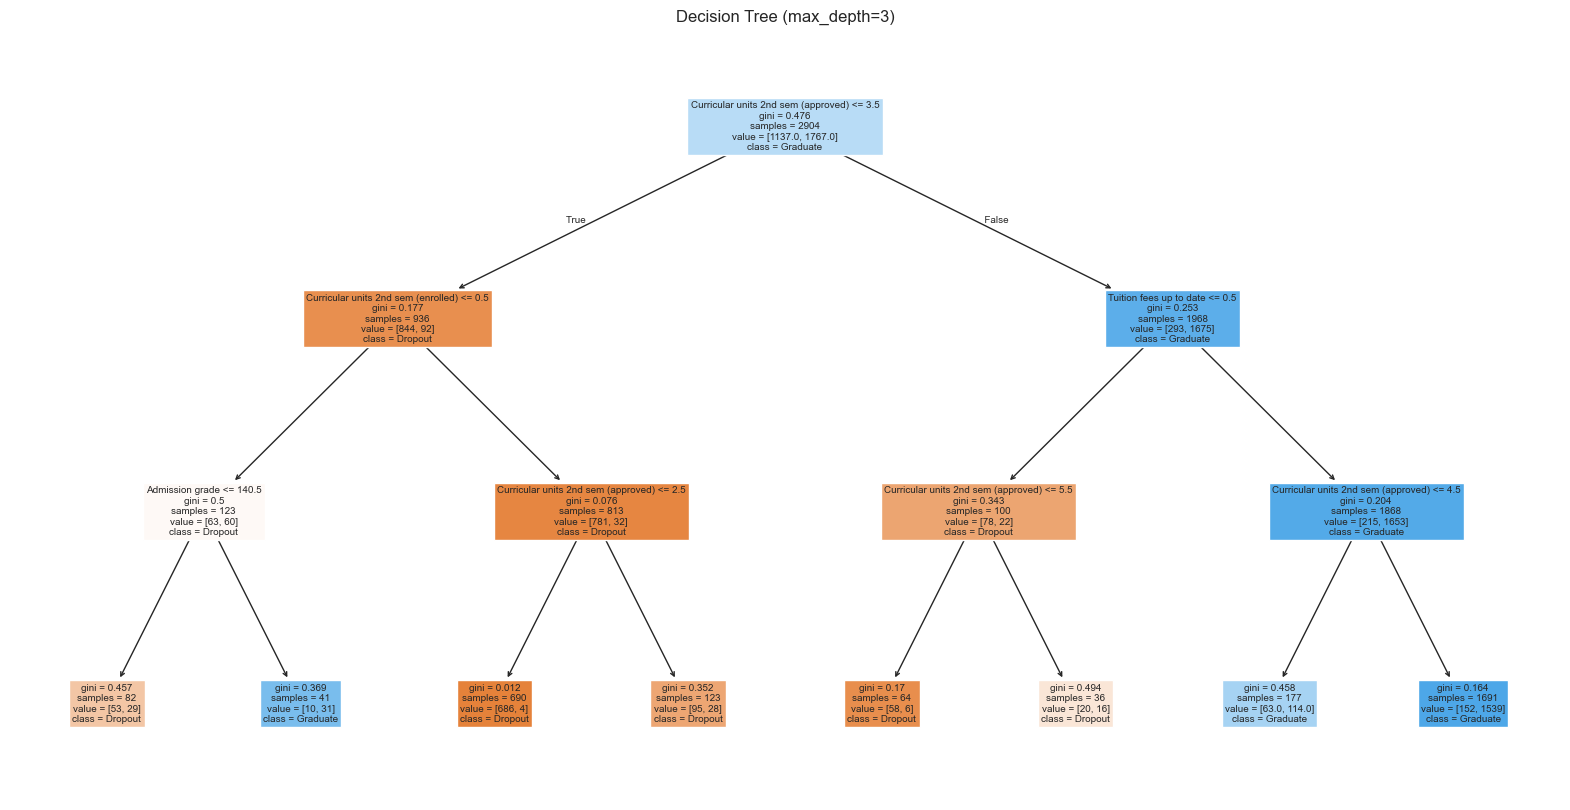

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=3, random_state=42)

**Results and Interpretability - Depth 3**

Accuracy: 0.89 — the model shows strong overall predictive performance.

Class-wise Performance:

- Dropouts: High precision (0.92) and solid recall (0.78) indicate the model effectively identifies most students at risk.

- Graduates: Excellent recall (0.96) and balanced precision (0.87), showing strong reliability in detecting successful students.

**Interpretability**:

The tree is shallow and easy to read, with splits driven mainly by academic performance and engagement factors:

- Curricular units approved and enrolled (2nd semester) – strongest determinants of success or dropout.

- Tuition fees up to date – indicates financial stability and academic persistence.

- Previous qualification and admission grades – reflect baseline academic readiness.

*How increasing the depth to 4 will influence the tradeoff between accuracy and interpretability?*

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



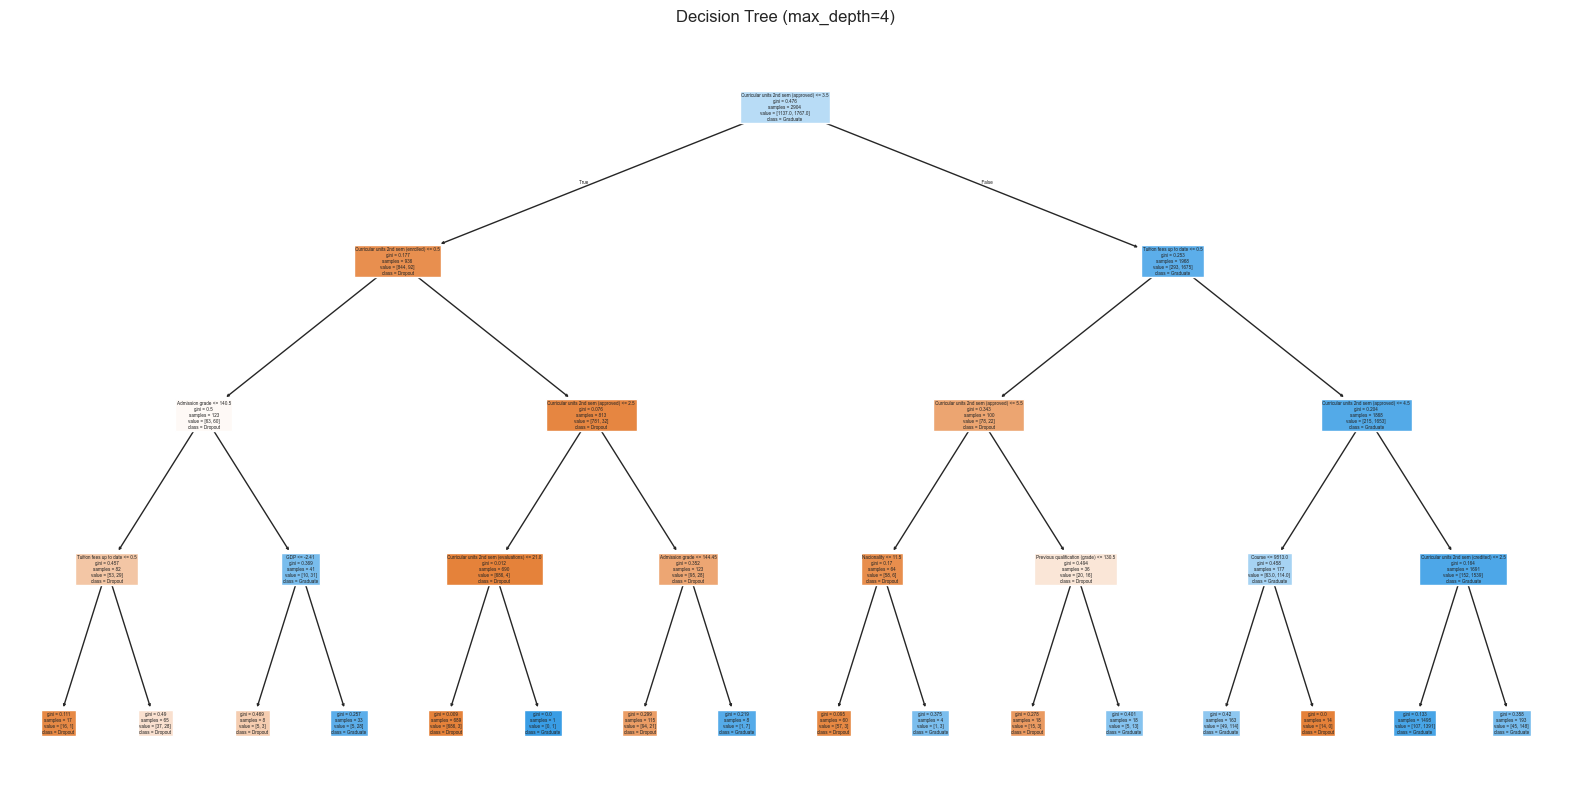

In [27]:
tree_clf = decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=4, random_state=42)

**Results and Interpretability - Depth 4**

Accuracy: 0.88 — almost unchanged from depth 3, showing the model has reached a performance plateau.

Class-wise performance:

- Dropout: F1 = 0.84 (Precision = 0.91, Recall = 0.78)

- Graduate: F1 = 0.91 (Recall = 0.95)

**Interpretability**:

The additional layer introduces slightly more detail but increases complexity.

Core predictors remain the same: Curricular units approved/enrolled (2nd sem), Tuition fees up to date, and Previous qualification grade.

A few secondary variables appear (e.g., Admission grade, Age), refining boundary cases but making the tree less immediately readable.

**Conclusion**:

Depth 4 improves class balance marginally but offers limited performance gain for a noticeable loss in clarity. The tree remains understandable, yet depth 3 provides a cleaner, nearly equivalent alternative.

**Because it became so hard to intepret the decision tree graphically, we can confirm the conclusions stated above by  exporting the  if–then rules of the DT using export_text() to see exactly how the model decides which students are likely to graduate or drop out.**, and confirm the conclusions above.

In [28]:
from sklearn.tree import export_text
print(export_text(tree_clf, feature_names=list(X_train.columns), max_depth=4))


|--- Curricular units 2nd sem (approved) <= 3.50
|   |--- Curricular units 2nd sem (enrolled) <= 0.50
|   |   |--- Admission grade <= 140.50
|   |   |   |--- Tuition fees up to date <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Tuition fees up to date >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Admission grade >  140.50
|   |   |   |--- GDP <= -2.41
|   |   |   |   |--- class: 0
|   |   |   |--- GDP >  -2.41
|   |   |   |   |--- class: 1
|   |--- Curricular units 2nd sem (enrolled) >  0.50
|   |   |--- Curricular units 2nd sem (approved) <= 2.50
|   |   |   |--- Curricular units 2nd sem (evaluations) <= 21.00
|   |   |   |   |--- class: 0
|   |   |   |--- Curricular units 2nd sem (evaluations) >  21.00
|   |   |   |   |--- class: 1
|   |   |--- Curricular units 2nd sem (approved) >  2.50
|   |   |   |--- Admission grade <= 144.45
|   |   |   |   |--- class: 0
|   |   |   |--- Admission grade >  144.45
|   |   |   |   |--- class: 1
|--- Curricular units 2nd sem (approved

<a id="explainable-boosting-machine"></a>
#### **Explainable Boosting Machine**


While the Decision Tree provided clear, rule-based explanations and solid accuracy, it still has limitations:

- It captures only hierarchical, piecewise-linear relationships — each split is a hard boundary.
- Increasing tree depth improves accuracy but reduces interpretability.
- Some variables (like socioeconomic factors or academic grades) may interact in non-linear or additive ways that a simple tree can’t model effectively.

To address this, we now move to an Explainable Boosting Machine (EBM) — a glass-box model that:

- Extends linear models by learning smooth, non-linear feature effects,
- Automatically captures pairwise interactions when relevant,


**The Decision Tree explains how decisions are made step-by-step. The EBM explains why each feature contributes to the prediction — giving a smoother, more generalizable view of the same problem.**

In [29]:
ebm = explainable_boosting_classifier(X_train, y_train, X_test, y_test)


Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [30]:
# Global explanation: shows each feature’s contribution strength
ebm_global = ebm.explain_global()
show(ebm_global)


<!-- http://127.0.0.1:7593/6098829760/ -->

<a id="post-modelling-explanations"></a>
### **Post-Modelling Explanations**

<a id="black-box-training"></a>
#### **Black Box Model Training**

In [31]:
from utils.post_modelling_utils import *

Helper function 'match_dtypes' defined.


**Why XGBoost?**

We selected **XGBoost** as our "black-box" model because it is widely considered state-of-the-art for tabular data. It uses an ensemble of gradient-boosted decision trees to capture complex, non-linear relationships and high-order interactions between features.

While XGBoost typically provides superior predictive performance compared to simple Decision Trees or EBMs, it lacks intrinsic interpretability. We cannot easily trace the decision path for a specific student. This trade-off makes it an ideal candidate to demonstrate the value of **Post-Hoc XAI techniques**—methods that help us explain complex models after they are trained.

In [32]:
xgb_model = train_xgb_pipeline(X_train, X_test, y_train, y_test)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.92      0.91      0.91       726


=== Confusion Matrix ===
[[232  52]
 [ 12 430]]

Artifacts saved to folder: src/xgb_model


**Model Performance Analysis**

The XGBoost model demonstrates robust performance on the test set. By leveraging boosting, it effectively minimizes errors that simpler models might miss.
- **High Accuracy/F1-Score:** Indicates the model effectively distinguishes between students likely to dropout and those who will graduate.
- **Black Box Nature:** Despite these good results, the model gives us no immediate insight into *why* a specific student was classified as "Dropout". To trust and act on these predictions, we need to apply XAI techniques.

<a id="Post-Hoc-XAI-Techniques"></a>
#### **Post-Hoc XAI Techniques**

**Post-Hoc XAI techniques** are explanation methods applied *after* a model has been trained. They treat the model as a "black box," analyzing only its inputs and outputs without needing access to its internal weights or structure.

These techniques allow us to have the best of both worlds: the high predictive power of complex algorithms (like XGBoost or Neural Networks) and the transparency required for decision-making in sensitive areas like education.

## **Simplification-Based Techniques (Global Surrogate Models)**

This approach involves training a simple, interpretable model (the **surrogate**) to approximate the predictions of the complex black-box model.

In this project, we use a **Decision Tree** as our surrogate model.
1. We take the predictions generated by XGBoost.
2. We train a Decision Tree to predict *those XGBoost predictions* (not the original ground truth).
3. If the Decision Tree is accurate (high fidelity), we can inspect its rules to understand the global logic that the XGBoost model is using.

In [33]:
surrogate_model = surrogate_model_from_xgb(xgb_model, X_train)

In [34]:
evaluate_surrogate_model(xgb_model, surrogate_model, X_test)


=== Surrogate Model Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       244
           1       0.96      0.96      0.96       482

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726


=== Surrogate Model Confusion Matrix ===
[[224  20]
 [ 20 462]]

=== R2 Score ===
R² (fidelity) of the surrogate model: 0.7531

=== Agreement Rate ===
Agreement Rate: 0.9449035812672176


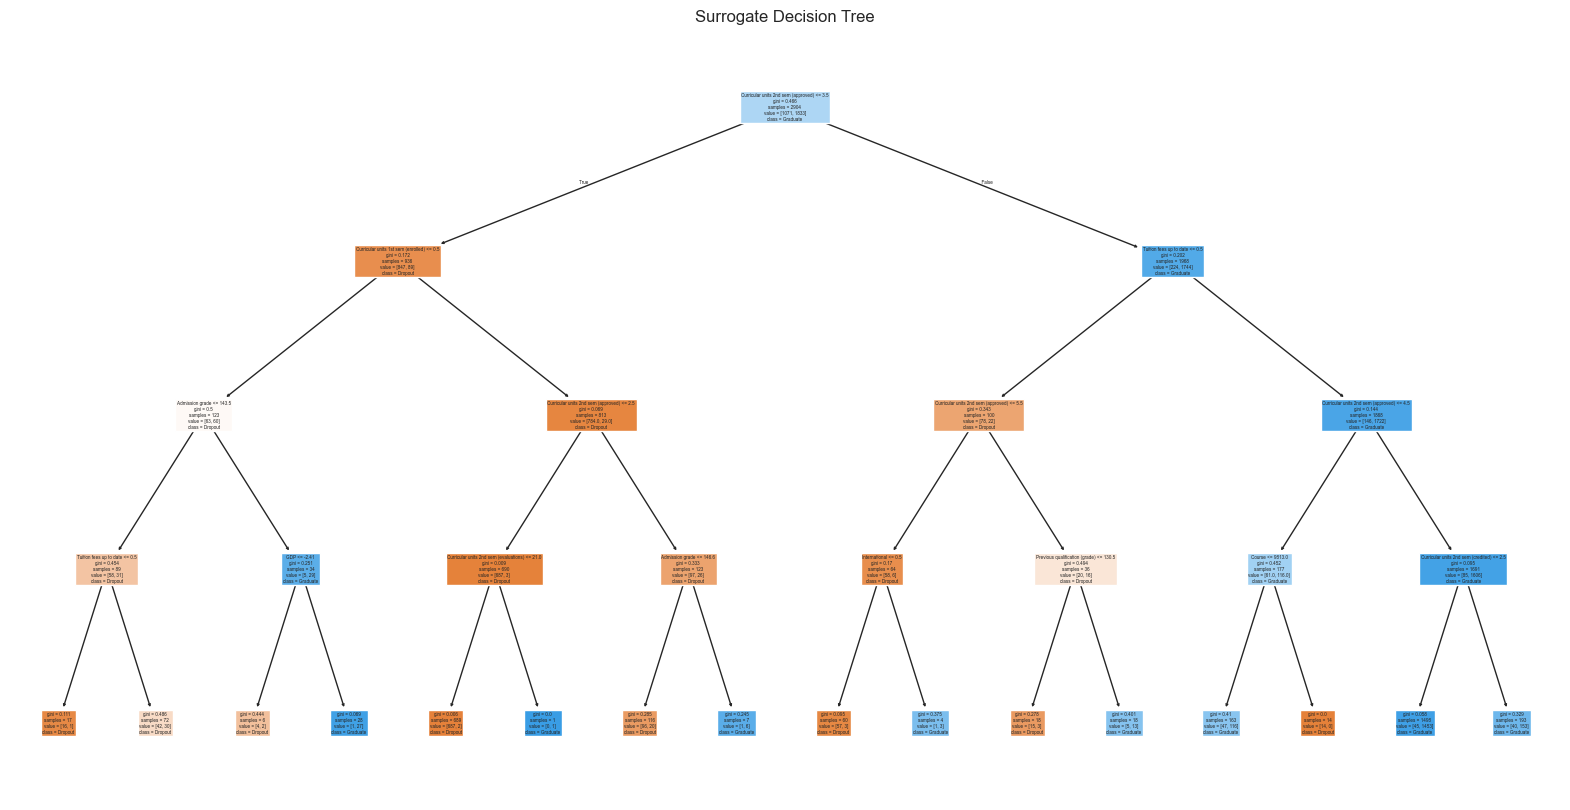

In [35]:
plot_surrogate_tree(surrogate_model, feature_names=X_train.columns)

**Surrogate Model Results**

The evaluation above measures the **Fidelity** of our surrogate Decision Tree—how well it mimics the XGBoost model.

- **High Fidelity Score:** If the accuracy/R² is high, it means the Decision Tree successfully captured the decision boundaries of the XGBoost model. We can trust the rules of this tree as a valid explanation of the complex model.

- **Tree Analysis:** By observing the surrogate tree structure, we can identify the most critical decision paths learned by the XGBoost model:

    - Root Node: The top split is determined by Curricular units 2nd sem (approved) <= 3.5. This confirms that academic performance in the second semester is the most dominant feature. Students with 3.5 or fewer approved units move to the left branch (predominantly "Dropout" territory), while those with more approved units move to the right branch (predominantly "Graduate" territory).

    - Secondary Splits: The tree further refines predictions based on the initial academic split:

    - Left Branch: For students with fewer approved units, the next check is Curricular units 2nd sem (enrolled). This distinguishes between students who barely enrolled in courses versus those who enrolled but failed. Deeper splits here involve Admission grade and Previous qualification (grade).

    - Right Branch: For students with higher academic performance, the immediate next splitter is Tuition fees up to date. This indicates that for students who are passing their classes, financial standing is the next most critical indicator of whether they will graduate or drop out.

    - Leaf Nodes: The final leaves give us the predicted class. We can observe that "Graduate" nodes (blue) are heavily concentrated on the right side of the tree (high approved units and paid tuition), while "Dropout" nodes (orange) are concentrated on the left.

This confirms that despite its complexity, the XGBoost model bases its core decisions on interpretable and logical student characteristics, primarily prioritizing academic performance and financial status.

## **Feature-Based Techniques** 

Feature-Based Techniques focus on quantifying the contribution of each variable (feature) to the model's predictions. Unlike surrogate models that try to replicate the entire model structure, these techniques isolate the impact of variables.

We will explore:
1. **Global Feature Importance**: Which variables are most useful for building the XGBoost trees.
2. **Partial Dependence Plots (PDP)**: How the probability of success changes as we vary the value of a specific feature.
3. **SHAP (SHapley Additive exPlanations)**: A unified approach that explains individual and global predictions based on game theory.

In [36]:
feature_importance_df = feature_importance(xgb_model, X_train.columns)

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.262790
16                         Tuition fees up to date    0.093258
24             Curricular units 1st sem (approved)    0.060915
22             Curricular units 1st sem (enrolled)    0.054500
28             Curricular units 2nd sem (enrolled)    0.034045
27             Curricular units 2nd sem (credited)    0.028033
15                                          Debtor    0.027314
31                Curricular units 2nd sem (grade)    0.026899
20                                   International    0.023833
3                                           Course    0.023532
26  Curricular units 1st sem (without evaluations)    0.022499
18                              Scholarship holder    0.021415
17                                          Gender    0.020058
29          Curricular units 2nd sem (evaluations)    0.019433
23          Curricular units 1st sem (evaluations)    0

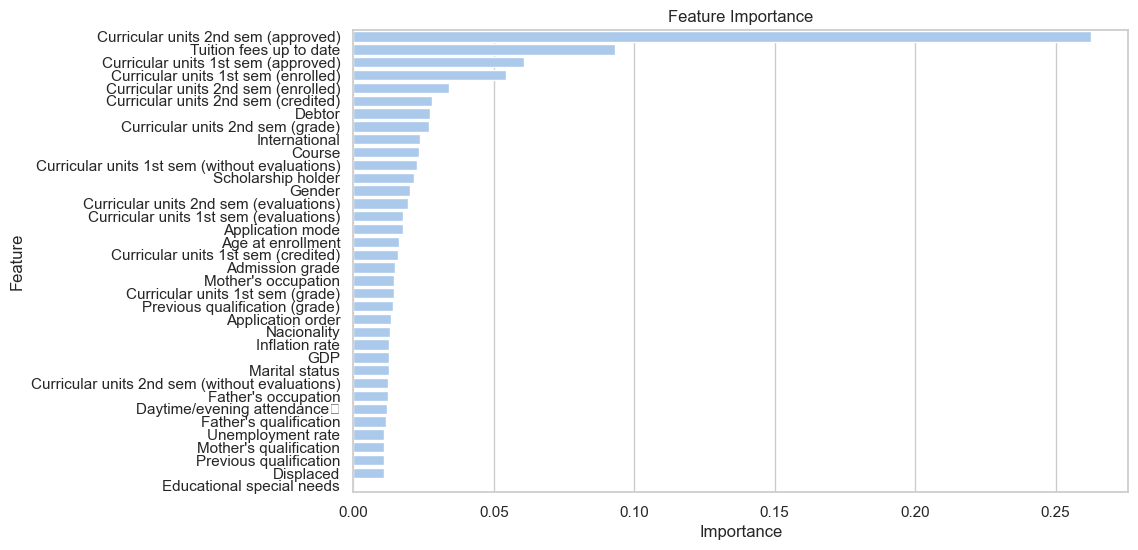

In [37]:
plot_feature_importance(feature_importance_df)

**Feature Importance Analysis**

The bar chart above shows the features that contributed most to impurity reduction (information gain) during XGBoost training.

*   **Academic Dominance**: Variables related to 2nd-semester performance (`Curricular units 2nd sem (approved)`, `grade`) are distinctly the most important. This confirms that recent success is the best predictor of the future.
*   **Financial Factor**: `Tuition fees up to date` appears as a top variable, indicating that financial regularity is a strong indicator of continuity.
*   **Comparison**: Interestingly, demographic or macroeconomic factors have much less weight compared to immediate academic performance.

In [38]:
print(type(xgb_model))
print(np.unique(y_train, return_counts=True))


<class 'xgboost.sklearn.XGBClassifier'>
(array([0, 1]), array([1137, 1767]))


ValueError: cannot reshape array of size 1 into shape (2)

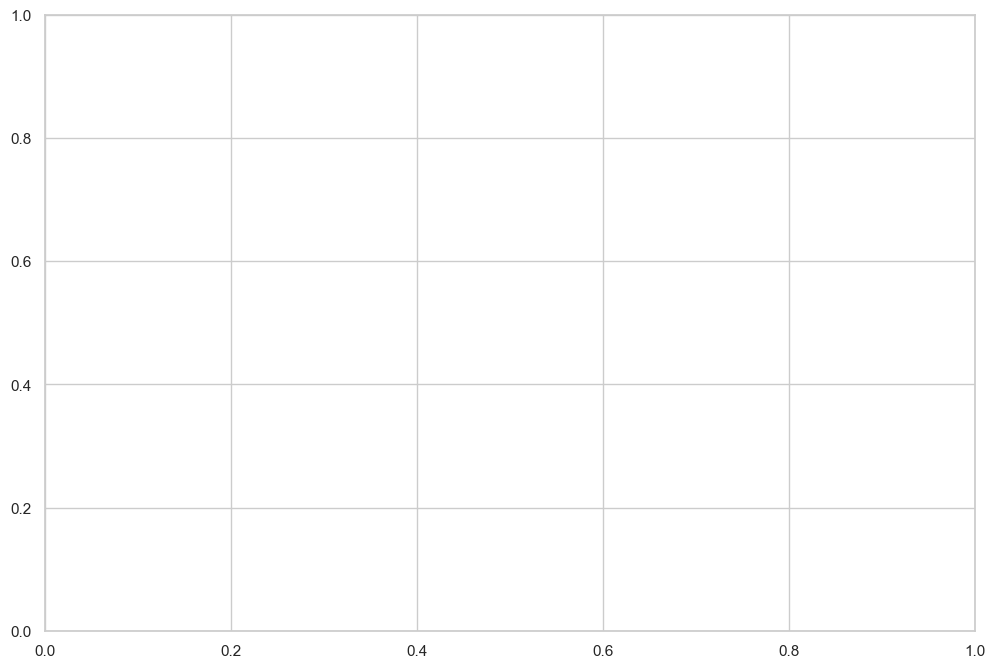

In [39]:
features_to_plot = [30, 16, 24]

plot_pdp(xgb_model, X_train, features_to_plot)

**Partial Dependence Plots (PDP) Analysis**

PDPs show the marginal effect of a feature on the predicted probability of a student graduating.

*   **Curricular units 2nd sem (approved)**: We see a clear and sharp trend. As the number of approved units increases, the probability of graduation rises drastically. There is a 'tipping point' (likely around 3-4 units) where the probability skyrockets.
*   **Tuition fees up to date**: Likely shows a significant step: having tuition fees up to date substantially increases the base probability of success compared to those who don't.


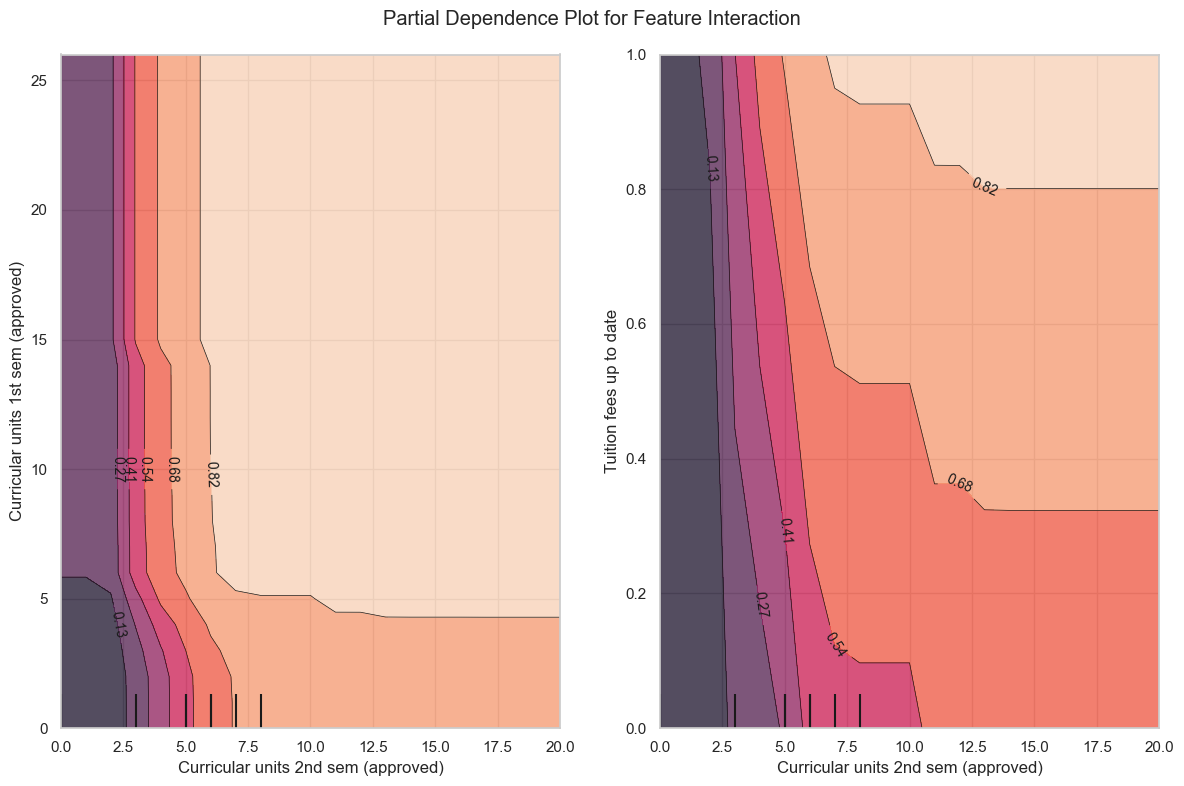

: 

: 

In [ ]:
selected_features = [(30, 24), (30, 16)]

plot_pdp_interaction(xgb_model, X_train, selected_features)

**Interaction Analysis (PDP Interaction)**

This plot allows us to see if the effect of one feature depends on the value of another.

*   By crossing, for example, `Tuition fees` with `Approved units`, we can observe combined effects. It is possible that having many approved units increases the probability of success, but this increase is 'dampened' if tuition fees are not up to date.
*   These interactions help identify specific risk groups that univariate analysis might miss (e.g., students with good grades but financial difficulties).

### **SHAP (SHapley Additive exPlanations)**

SHAP is an advanced technique based on Game Theory. It assigns an importance value to each feature for *each individual prediction*.

*   **Positive SHAP Value**: The feature pushes the prediction towards the "Graduate" class.
*   **Negative SHAP Value**: The feature pushes the prediction towards the "Dropout" class.

The sum of the SHAP values of all features (+ the base value) results exactly in the probability predicted by the model. This property makes SHAP extremely reliable for explaining individual decisions.

In [ ]:
shap_values, explainer = apply_shap(xgb_model, X_train)

: 

: 

In [ ]:
print(shap_values.shape)

(2904, 36)


: 

: 

In [ ]:
indices_graduated = y_train[y_train == 1].index
indices_dropout = y_train[y_train == 0].index


graduated_index = indices_graduated[0]
dropout_index = indices_dropout[0]

print(f"Graduated student index: {graduated_index}")
print(f"Dropout student index: {dropout_index}")


Graduated student index: 291
Dropout student index: 968


: 

: 

Marital status                                       1.000000
Application mode                                    44.000000
Application order                                    1.000000
Course                                            9003.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                              39.000000
Previous qualification (grade)                     150.000000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              37.000000
Mother's occupation                                  6.000000
Father's occupation                                  6.000000
Admission grade                                    150.000000
Displaced                                            0.000000
Educational special needs                            0.000000
Debtor                                               1.000000
Tuition 

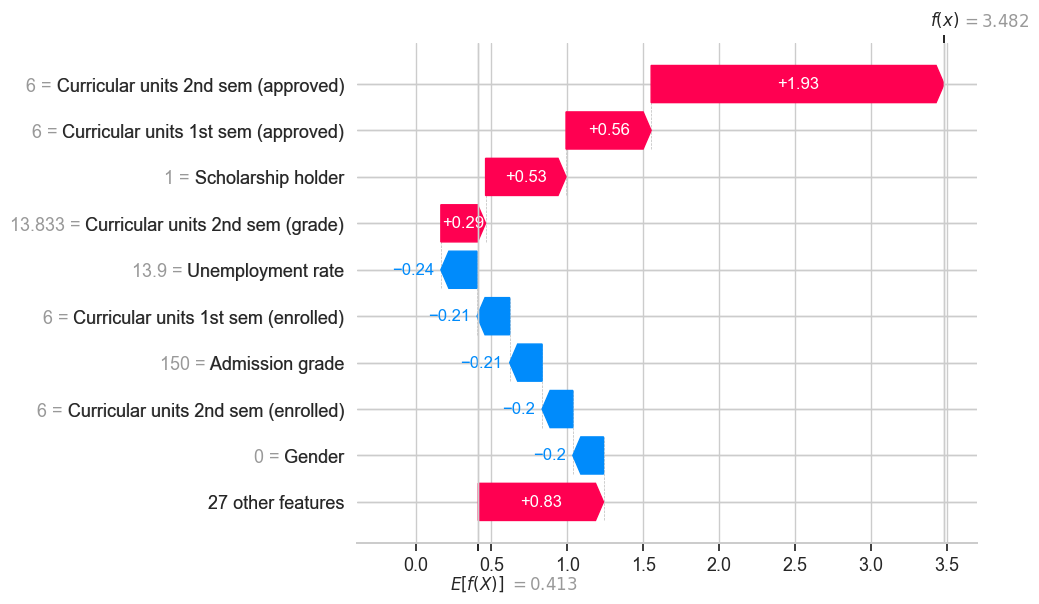

: 

: 

In [ ]:
# SHAP values for a Graduated Student
instance_index = 291

plot_shap_instance(shap_values, explainer, X_train, instance_index)

Marital status                                       2.00
Application mode                                    39.00
Application order                                    1.00
Course                                            9991.00
Daytime/evening attendance\t                         0.00
Previous qualification                               1.00
Previous qualification (grade)                     135.00
Nacionality                                          1.00
Mother's qualification                              34.00
Father's qualification                              34.00
Mother's occupation                                  0.00
Father's occupation                                  0.00
Admission grade                                    134.10
Displaced                                            1.00
Educational special needs                            0.00
Debtor                                               0.00
Tuition fees up to date                              0.00
Gender        

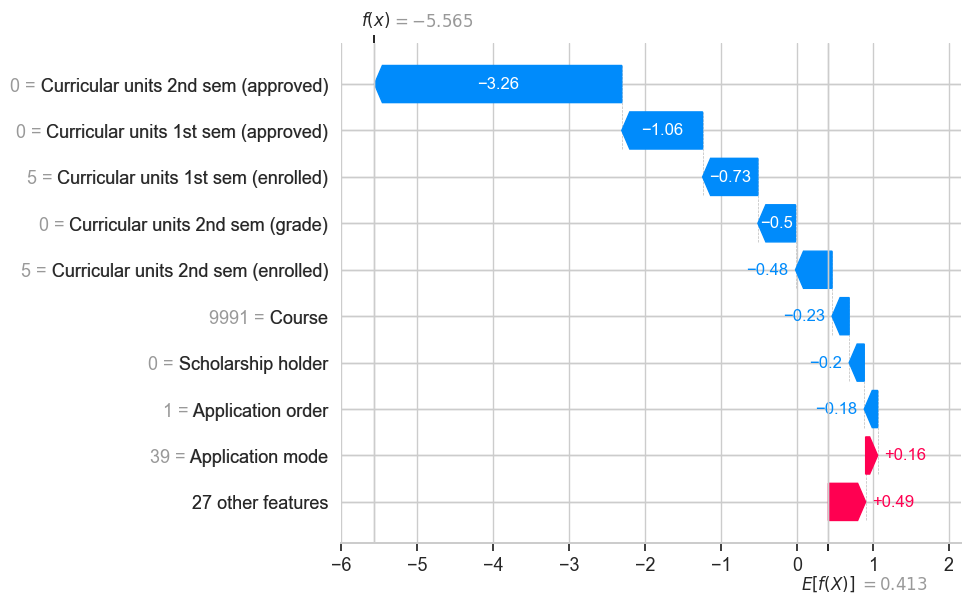

: 

: 

In [ ]:
# SHAP values for a Dropout Student
instance_index = 968

plot_shap_instance(shap_values, explainer, X_train, instance_index)

**Local Analysis: Graduate vs Dropout**

The 'Waterfall' plots above dissect the model's decision for two specific students:

1.  **Graduated Student**:
    *   The chart shows how we start from the average probability (E[f(x)]) and reach the high final prediction.
    *   **Red bars (positive)** indicate success factors. We will likely see `Curricular units 2nd sem (approved)` with a high value.

2.  **Dropout Student**:
    *   Here we see the opposite. **Blue bars (negative)** dominate, pushing the probability down.
    *   Factors like few approved units, overdue tuition fees, or debts (`Debtor`) are often the main culprits leading the model to predict dropout.

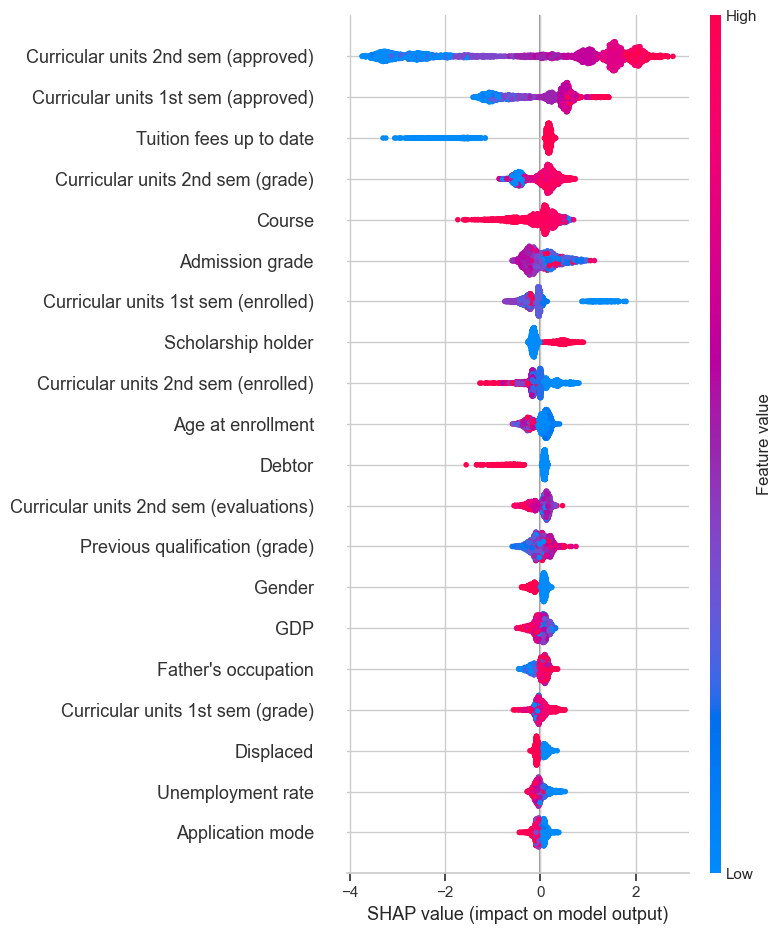

: 

: 

In [ ]:
shap.summary_plot(shap_values, X_train)

**Global Analysis with SHAP Summary Plot**

This 'Beeswarm plot' is one of the richest visualizations in XAI, combining feature importance with its directional effect.

*   **Y-Axis**: Features ordered by global importance (sum of absolute SHAP values).
*   **X-Axis**: SHAP value (impact on prediction).
*   **Color**: Feature value (Red = High, Blue = Low).

**Key Insights:**

1.  **Curricular units 2nd sem (approved)**:
    *   **Red** points (many approved units) are strongly on the **Positive** side (right) -> Increase chance of graduating.
    *   **Blue** points (few units) are on the **Negative** side (left) -> Drastically increase dropout risk.

2.  **Tuition fees up to date**:
    *   **Blue** points (value 0 = not paid) have a strong **Negative** impact. Not paying tuition is a very strong risk signal for the model.
    *   **Red** points (paid) have a positive impact, but more moderate.

3.  **Dispersion and Tails**:
    *   Features with large horizontal dispersion (like curricular units) have very high discriminative power.
    *   We can see that for some**Global Analysis with SHAP Summary Plot**

This 'Beeswarm plot' is one of the richest visualizations in XAI, combining feature importance with its directional effect.

*   **Y-Axis**: Features ordered by global importance (sum of absolute SHAP values).
*   **X-Axis**: SHAP value (impact on prediction).
*   **Color**: Feature value (Red = High, Blue = Low).

**Key Insights:**

1.  **Curricular units 2nd sem (approved)**:
    *   **Red** points (many approved units) are strongly on the **Positive** side (right) -> Increase chance of graduating.
    *   **Blue** points (few units) are on the **Negative** side (left) -> Drastically increase dropout risk.

2.  **Tuition fees up to date**:
    *   **Blue** points (value 0 = not paid) have a strong **Negative** impact. Not paying tuition is a very strong risk signal for the model.
    *   **Red** points (paid) have a positive impact, but more moderate.

3.  **Dispersion and Tails**:
    *   Features with large horizontal dispersion (like curricular units) have very high discriminative power.
    *   We can see that for some features, extreme values (points far to the left or right) have disproportionately high impacts, identifying critical cases.

## Example-Based Techniques

**Example-Based Techniques** explain model behavior by selecting specific instances (examples) from the dataset rather than summarizing features. They answer questions like "Which other students are similar to this one?" or "What conditions must hold for this prediction to remain valid?".

In this section, we use **Anchors**, a technique that provides high-precision rules (if-then conditions) to explain individual predictions.

### Anchors

In [ ]:
explanation = apply_anchor(xgb_model, X_train, X_test)

Fitting Anchor Explainer...
Explaining instance 0...

=== Anchor Explanation for instance 0 ===
Anchor: ['Curricular units 2nd sem (approved) > 6.00', 'Curricular units 1st sem (approved) > 3.00', 'Curricular units 1st sem (evaluations) <= 10.00']
Precision: 0.96
Coverage: 0.80


: 

: 

**Anchor Explanation Analysis**

The output above reveals a highly robust rule (Anchor) that explains the model's prediction for this student.

*   **The Anchor Rule**: The model guarantees this prediction if the following three conditions are met simultaneously:
    1.  `Curricular units 2nd sem (approved) > 6.00`: The student passed more than 6 units in the 2nd semester (very high performance).
    2.  `Curricular units 1st sem (approved) > 3.00`: The student passed more than 3 units in the 1st semester.
    3.  `Curricular units 1st sem (evaluations) <= 10.00`: The student did not require an excessive number of evaluations (exams/resits) in the 1st semester.

*   **Precision (0.96)**: This is the "trustworthiness" of the rule. In **96%** of the cases where a student meets these exact academic criteria, the model predicts the same outcome (likely "Graduate"). This means the rule is extremely reliable.

*   **Coverage (0.80)**: This is the "generality" of the rule. A coverage of **0.80** is exceptionally high for an Anchor. It implies that this specific "recipe for success" (consistent academic performance without excessive failures/retakes) is very common and applies to a large portion of the student population in this vicinity.

**Conclusion**:
Unlike SHAP, which gives us feature weights, this Anchor gives us a **sufficient condition**. We can tell a stakeholder: *"Regardless of tuition fees, age, or demographics, if a student passes >6 units in the 2nd semester and maintains decent 1st-semester performance, they are almost guaranteed to graduate according to this model."*

### Counterfactual Explanations

In [40]:
import dice_ml
from RobustXGModel import RobustXGBModel

#### - The DiCE Framework

To provide actionable feedback to students and tutors, we use Diverse Counterfactual Explanations (DiCE). Unlike feature importance (SHAP), which tells us which features matter, DiCE tells us how to change them to achieve a desired outcome.


We formulate this as an optimization problem minimizing a loss function L that balances three objectives:

- Validity: The counterfactual must actually change the model's prediction to "Graduate".
- Proximity: The changes should be minimal (realistic).
- Diversity: The model should propose multiple different ways to succeed.

In [41]:
continuous_vars = [
    # Macroeconomic
    'Unemployment rate', 'Inflation rate', 'GDP',
    
    # Demographics / History (Numeric)
    'Age at enrollment', 
    'Admission grade', 
    'Previous qualification (grade)', 
    'Application order',
    
    # 1st Semester Numeric Features
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (without evaluations)',

    # 2nd Semester Numeric Features
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (without evaluations)'
]

In [42]:
d = dice_ml.Data(dataframe=df, continuous_features=continuous_vars, outcome_name='Target')

# Initialize DiCE Model using the ROBUST WRAPPER
robust_model = RobustXGBModel(xgb_model)
m = dice_ml.Model(model=robust_model, backend="sklearn")

# Initialize Explainer
exp = dice_ml.Dice(d, m, method="random")
print("DiCE Explainer re-initialized with Robust Wrapper (P2 Fix Applied).")

DiCE Explainer re-initialized with Robust Wrapper (P2 Fix Applied).


**The problem :** DiCE is mathematically smart but can´t really understand context. DICE searchs for the shortest path to change a prediction, ignoring real-world rules (e.g., "you can't change the past" or "students can't self-issue scholarships").

    To fix this, we stop treating all features equally. We create "Personas"—distinct sets of rules that force the AI to look for solutions only within the specific "powers" of the person asking the question

#### The Two Personas (Constraint Sets)

| **Persona**                                       | **Who is Asking?**        | **The Question (Goal)**                                           | **What CAN Change? (Actionable Features)**                 | **What is LOCKED? (Immutable Constraints)**                    |
| ------------------------------------------------- | ------------------------- | ----------------------------------------------------------------- | ---------------------------------------------------------- | -------------------------------------------------------------- |
| **P1: The Student (The “Effort” View)**           | The Student               | “What can I do next semester to save my degree?”                  | Future Performance (2nd Sem Grades, Exams)                 | Financials & History (Tuition, Scholarship, 1st Sem Grades)    |
| **P2: The Institution (The “Support” View)**      | Financial Officer / Admin | “Can we save this student purely through administrative support?” | Financial/Admin Status (Tuition Fees, Scholarship, Debtor) | Academic Grades (The school cannot take tests for the student) |


#### Configuration of Persona-Based Constraint

As stated above, we will be defyning the 2 personas.

* **P1: The Student:** Can only change **future** academic performance (2nd Semester). Financials and history are locked.


In [43]:
# Persona 1: The Student (Actionable Effort)
# Constraints: Can only change 2nd sem outcomes.
features_student = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]



* **P2: The Institution:** Can only change **administrative/financial** status. Grades are locked.


In [44]:
# Persona 2: The Institution (Financial Support)
# Constraints: Can only change financial/admin status.
features_institution = [
    'Tuition fees up to date', 
    'Scholarship holder', 
    'Debtor'
]

In [45]:
# Target Class: 1 = Graduate
desired_class = 1

#### Case Study A: The "Financial Cliff"

* **Profile:** Good grades, but financial debt.
* **Prediction:** Dropout.
* **Goal:** Compare if the student needs to study harder (P1) or needs financial aid (P2).

-> We define **financial risk** as ('Debtor' == 1 && 'Tuition fees up to data' == 0)

-> We define **Academic Sucess** as ('Curricular units 1st sem (approved)' >= 4 && 'Curricular units 1st sem (grade)'>= 11)

In [46]:
query_instance_A = select_dropout_candidate(
    X_test=X_test,
    model=xgb_model,
    df_reference=df
)


Candidates found: 46

Selected Student #4085 (Predicted Dropout)

--- Student Profile (Fixed Types) ---
      Tuition fees up to date  Debtor  Marital status  \
4085                        0       1               1   

      Curricular units 1st sem (grade)  
4085                              12.0  


In [47]:
print(f"Analyzing Student #{query_instance_A.index[0]}...")
print(f"Current Prediction: {'Dropout' if xgb_model.predict(query_instance_A)[0] == 0 else 'Graduate'}")

# --- Persona P1: The Student ---
print("\n[P1] Student View: 'Can I study my way out of this?'")

try:
    dice_exp_A1 = exp.generate_counterfactuals(query_instance_A, total_CFs=3, desired_class=desired_class,features_to_vary=features_student,
        permitted_range={
            'Curricular units 2nd sem (grade)': [10, 20],
            'Curricular units 2nd sem (approved)': [0, 8]
        }
    )

    result_p1 = dice_exp_A1.cf_examples_list[0].final_cfs_df
    
    pretty_print_cfs(cf_df=result_p1,features_varied=features_student,label="P1",model=xgb_model,original_instance=query_instance_A
    )

except Exception as e:
    print("[P1] INSIGHT: The student is 'Study-Blocked'.")
    print("Even with perfect grades, the risk remains too high.")




Analyzing Student #4085...
Current Prediction: Dropout

[P1] Student View: 'Can I study my way out of this?'


  0%|          | 0/1 [00:00<?, ?it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

[P1] INSIGHT: The student is 'Study-Blocked'.
Even with perfect grades, the risk remains too high.


In [48]:
# --- Persona P2: The Institution ---
print("\n[P2] Institution View: 'Can financial aid save them?'")

try:
    dice_exp_A2 = exp.generate_counterfactuals( query_instance_A,  total_CFs=3, desired_class=desired_class,
                                                features_to_vary=features_institution
    )

    result_p2 = dice_exp_A2.cf_examples_list[0].final_cfs_df

    pretty_print_cfs( cf_df=result_p2,features_varied=features_institution, label="P2",model=xgb_model,
                      original_instance=query_instance_A
    )

except Exception as e:
    print("[P2] INSIGHT: The student is 'Fin-Blocked'.")
    print(f"Error: {e}")



[P2] Institution View: 'Can financial aid save them?'


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]



[P2] Actionable Counterfactuals (prediction flips!)
 Tuition fees up to date  Scholarship holder  Debtor  Target
                       1                   1       0       1
                       1                   0       0       1
                       1                   1       1       1




    So, for this student with relatively good grades but in a bad financial state, the counterfactuals show that academic improvements do not flip the prediction, but financial changes do.

#### Case Study B: The "Academic Slide" 

- Profile: Tuition paid and scholarship holder, but failing grades.
- Prediction: Dropout.
- Goal: Determine if more money helps (P2) or if academic intervention is required (P1).

In [49]:
query_instance_B = select_academic_slide_candidate(X_test=X_test,model=xgb_model, df_reference=df)

Candidates found: 11

Selected Academic-Slide Student #1864 (Predicted Dropout)

--- Academic Slide Student Profile (Fixed Types) ---
      Tuition fees up to date  Scholarship holder  Debtor  \
1864                        1                   1       0   

      Curricular units 1st sem (grade)  Curricular units 1st sem (approved)  
1864                               0.0                                    0  


In [50]:


print(f"\nAnalyzing Student #{query_instance_B.index[0]}...")
print(f"Current Prediction: {'Dropout' if xgb_model.predict(query_instance_B)[0] == 0 else 'Graduate'}")

# ---------------------------
# Persona P1: Student Effort
# ---------------------------
print("\n[P1] Student View: 'Can I study my way out of this?'")

dice_exp_B1 = exp.generate_counterfactuals(query_instance_B,total_CFs=3,desired_class=desired_class,features_to_vary=features_student,   # academic features
                                           permitted_range={ 'Curricular units 1st sem (grade)': [10, 20],
                                                            'Curricular units 1st sem (approved)': [0, 8]
    }
)

result_B1 = dice_exp_B1.cf_examples_list[0].final_cfs_df
pretty_print_cfs(cf_df=result_B1,features_varied=features_student,label="P1",model=xgb_model,original_instance=query_instance_B)






Analyzing Student #1864...
Current Prediction: Dropout

[P1] Student View: 'Can I study my way out of this?'


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


[P1] Actionable Counterfactuals (prediction flips!)
 Curricular units 2nd sem (grade)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (without evaluations)  Target
                             18.6                                    6                                       6                                               0       1
                              0.0                                   12                                       6                                               0       1
                              9.2                                    5                                       6                                               0       1




In [52]:
# ---------------------------
# Persona P2: Financial Help
# ---------------------------
print("\n[P2] Institution View: 'Does more financial help change anything?'")

try:
    dice_exp_B2 = exp.generate_counterfactuals( query_instance_B, total_CFs=3, desired_class=desired_class,
        features_to_vary=features_institution     # financial variables
    )

    result_B2 = dice_exp_B2.cf_examples_list[0].final_cfs_df
    pretty_print_cfs(cf_df=result_B2, features_varied=features_institution,label="P2", model=xgb_model,
        original_instance=query_instance_B
    )

except Exception as e:
    print("[P2] INSIGHT: The student is 'Fin-Blocked'.")
    print(f"Error: {e}")


[P2] Institution View: 'Does more financial help change anything?'


100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
[P2] INSIGHT: The student is 'Fin-Blocked'.
Error: No counterfactuals found for any of the query points! Kindly check your configuration.


    For this student, who is financially stable but performing poorly academically, the counterfactuals show that financial interventions do not change the prediction, but academic improvements do.

# TASK 4 

<a id="references"></a>
### **References**


<a id="ref-dataset"></a>
[1] UCI Machine Learning Repository. *Dropout and Academic Success Dataset*.  
https://archive.ics.uci.edu/dataset/697/dropout+and+academic+success
